# import e funzioni

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
def timeConverter(stringa):
  try:
    x = stringa.replace('.', ':')
    min, sec, ms = x.split(':')
    ms = float(ms)
    sec = float(sec)*1000
    min = float(min)*60*1000
    sec = (min+sec+ms)/1000
  except:
    sec = 0
  return sec

In [6]:
def qSelector(q1,q2,q3):
  if q2 == 0:
    return q1
  elif q3 == 0:
    return q1 if q1 <= q2 else q2
  
  elif q1 <= q2:
    return q1 if q1 <= q3 else q3
  elif q1 <= q3:
    return q1 if q1 <= q2 else q2
  elif q2 <= q3:
    return q2 if q2 <= q3 else q3

# Merging datasets

In [7]:
df_path = '/content/drive/MyDrive/Progetti/datasets/f1_23_09_22/'
circuits = pd.read_csv(df_path + 'circuits.csv') #
constr_results = pd.read_csv(df_path + 'constructor_results.csv')
constr_standings = pd.read_csv(df_path + 'constructor_standings.csv') #
constructors = pd.read_csv(df_path + 'constructors.csv') #
driver_standings = pd.read_csv(df_path + 'driver_standings.csv') #
drivers = pd.read_csv(df_path + 'drivers.csv') #
lap_times = pd.read_csv(df_path + 'lap_times.csv')
pit_stops = pd.read_csv(df_path + 'pit_stops.csv')
qualifying = pd.read_csv(df_path + 'qualifying.csv') #
races = pd.read_csv(df_path + 'races.csv') #
results = pd.read_csv(df_path + 'results.csv') #
#seasons = pd.read_csv(df_path + 'seasons.csv')
sprint_results = pd.read_csv(df_path + 'sprint_results.csv')
status = pd.read_csv(df_path + 'status.csv')

In [8]:
pit_stops = pit_stops[['raceId', 'milliseconds']]
races = races[['raceId', 'year', 'circuitId']]
circuits = circuits[['circuitId', 'name', 'location', 'country']]
qualifying = qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'position', 'q1', 'q2', 'q3']]
constr_standings = constr_standings[['raceId', 'constructorId', 'points', 'position', 'wins']]
constructors = constructors.drop('url', axis=1)
driver_standings.drop(columns=['driverStandingsId', 'positionText'], inplace=True)
drivers = drivers[['driverId', 'driverRef', 'code', 'surname', 'nationality']]
lap_times.drop('time', axis=1, inplace=True)

In [9]:
results.fastestLapSpeed[0]

'218.300'

In [10]:
results['race_duration_s'] = results['milliseconds'].apply(lambda x: round(float(x)*.001) if x != '\\N' else 0)
results['fastestLapTime'] = results['fastestLapTime'].apply(timeConverter)
results['fastestLapSpeed'] = results['fastestLapSpeed'].apply(lambda x : round(float(x) if x != '\\N' else 0))
results = results[['raceId', 'driverId', 'constructorId', 'positionOrder', 'race_duration_s', 'fastestLapTime', 'points', 'fastestLapSpeed']]
df = results.merge(races, on='raceId')
df = df.merge(circuits[['circuitId', 'location']], on='circuitId')
df = df.merge(constructors[['constructorId', 'constructorRef', 'nationality']], on='constructorId')
df.rename(columns={'nationality': 'constr_nationality'}, inplace=True)
df = df.merge(drivers[['driverId', 'driverRef', 'code', 'nationality']], on='driverId')
df.rename(columns={'nationality': 'driver_nationality', 'code': 'driver_code'}, inplace=True)
new_df = pd.merge(df, constr_standings,  how='left', left_on=['raceId','constructorId'], right_on = ['raceId','constructorId'])
df = new_df.rename(columns={'points': 'constr_points', 'position': 'constr_position', 'wins':  'constr_wins'})
df = pd.merge(df, driver_standings,  how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId'])
df.rename(columns={'points': 'driver_points', 'position': 'driver_position', 'wins':  'driver_wins'}, inplace=True)
qualifying.replace('\\N', np.nan, inplace=True)
qualifying['q1'] = qualifying['q1'].apply(timeConverter)
qualifying['q2'] = qualifying['q2'].apply(timeConverter)
qualifying['q3'] = qualifying['q3'].apply(timeConverter)
qualifying['best_q'] = [qSelector(qualifying['q1'][i], qualifying['q2'][i], qualifying['q3'][i]) for i in range(len(qualifying['q1']))]
qualifying = qualifying[['raceId', 'driverId', 'constructorId', 'position', 'best_q']]
qualifying = qualifying.rename(columns={'position': 'qual_position'})
df = pd.merge(df, qualifying,  how='left', left_on=['raceId', 'driverId','constructorId'], right_on = ['raceId', 'driverId','constructorId'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raceId              25660 non-null  int64  
 1   driverId            25660 non-null  int64  
 2   constructorId       25660 non-null  int64  
 3   positionOrder       25660 non-null  int64  
 4   race_duration_s     25660 non-null  int64  
 5   fastestLapTime      25660 non-null  float64
 6   points_x            25660 non-null  float64
 7   fastestLapSpeed     25660 non-null  int64  
 8   year                25660 non-null  int64  
 9   circuitId           25660 non-null  int64  
 10  location            25660 non-null  object 
 11  constructorRef      25660 non-null  object 
 12  constr_nationality  25660 non-null  object 
 13  driverRef           25660 non-null  object 
 14  driver_code         25660 non-null  object 
 15  driver_nationality  25660 non-null  object 
 16  poin

# Pilot analysis

In [ ]:
top3circ = ['Monte-Carlo', 'Monza', 'Barcelona']
top5driv = ['max_verstappen', 'leclerc', 'hamilton', 'norris', 'russell']
top3driv = ['max_verstappen', 'leclerc', 'hamilton']

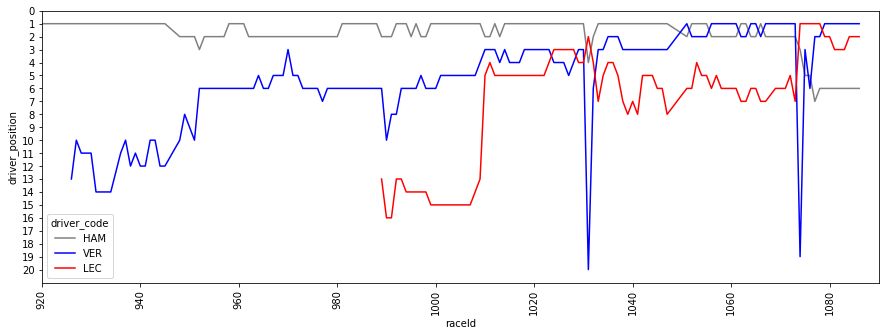

In [ ]:
palette = ['grey', 'blue', 'red']
df1 = df.loc[df.driverRef.isin(top3driv)]
df1 = df1[['raceId', 'driver_code', 'driver_position']].sort_values('raceId')
plt.figure(figsize=(15,5))
sns.lineplot(data=df1, x='raceId', y='driver_position', hue='driver_code', palette=palette)
plt.xticks(range(920, 1090, 20))
plt.xlim(920, 1090)
plt.yticks(range(0, 21, 1))
plt.ylim(0, 21)
plt.gca().invert_yaxis()
#plt.yticks(rotation=45)
plt.xticks(rotation=90)
plt.show()

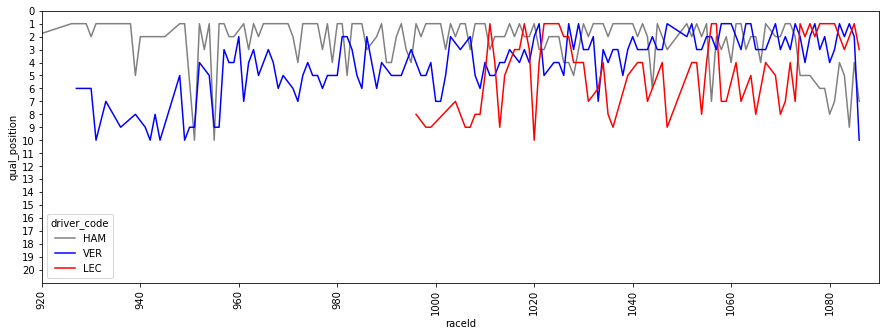

In [ ]:
palette = ['grey', 'blue', 'red']
df1 = df.loc[(df.driverRef.isin(top3driv) & (df.qual_position <= 10))]
df1 = df1[['raceId', 'driver_code', 'qual_position']].sort_values('raceId')
plt.figure(figsize=(15,5))
sns.lineplot(data=df1, x='raceId', y='qual_position', hue='driver_code', palette=palette)
plt.xticks(range(920, 1090, 20))
plt.xlim(920, 1090)
plt.yticks(range(0, 21, 1))
plt.ylim(0, 21)
plt.gca().invert_yaxis()
#plt.yticks(rotation=45)
plt.xticks(rotation=90)
plt.show()

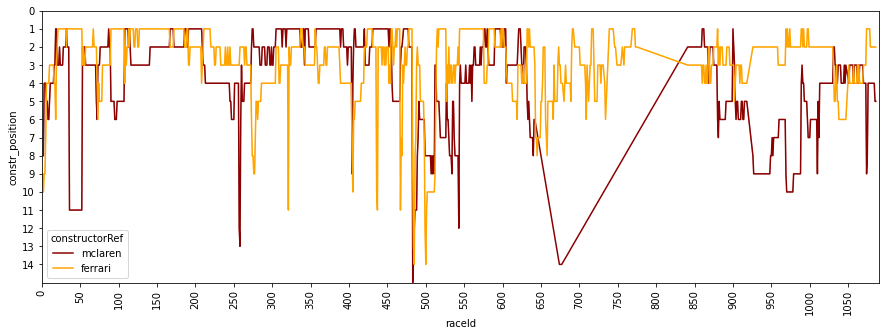

In [ ]:
colors = ['darkred', 'orange']
df1 = df.loc[df.constructorRef.isin(['ferrari', 'mclaren'])]
df1 = df1[['raceId', 'constructorRef', 'constr_position']].sort_values('raceId')
plt.figure(figsize=(15,5))
sns.lineplot(data=df1, x='raceId', y='constr_position', hue='constructorRef', palette=colors)
plt.xticks(range(0, 1090, 50))
plt.xlim(0, 1090)
plt.yticks(range(0, 15, 1))
plt.ylim(0, 15)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.show()

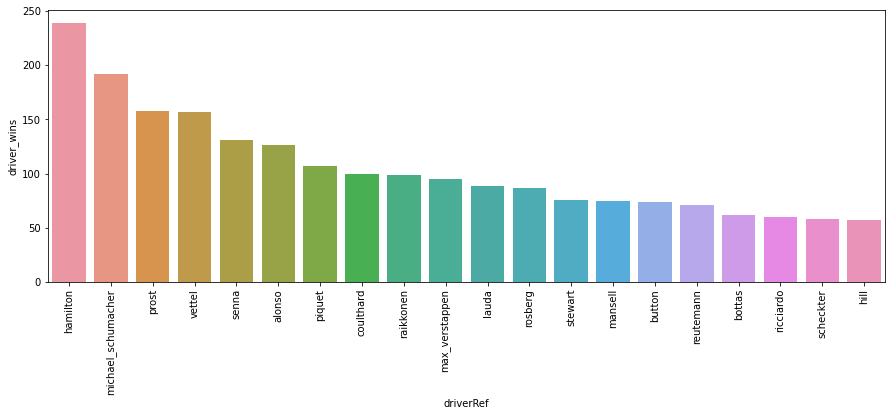

In [ ]:
df1 = df.loc[df.driver_wins > 0]
df1 = df1[['driverRef', 'driver_wins',]].groupby('driverRef').count().sort_values('driver_wins', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=df1, x=df1.index[:20], y=df1.driver_wins[:20])
plt.xticks(rotation=90)
plt.show()

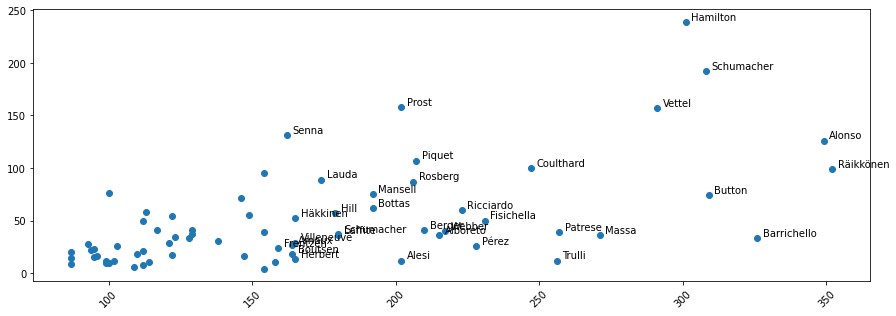

In [ ]:
df1 = df[['driverRef', 'raceId']].groupby('driverRef').count().sort_values('raceId', ascending=False)
df2 = df[['driverRef', 'driver_wins',]].where(df['driver_wins']>0).groupby('driverRef').count().sort_values('driver_wins', ascending=False)
df3 = df1.join(df2)
df3 = df3.merge(drivers[['driverRef', 'surname']], on='driverRef')
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x=df3.raceId[:100], y=df3.driver_wins[:100])
for i, txt in enumerate(df3.surname[:40]):
    ax.annotate(txt, (df3.raceId[i]+2, df3.driver_wins[i]+2))
    
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<function matplotlib.pyplot.show(*args, **kw)>

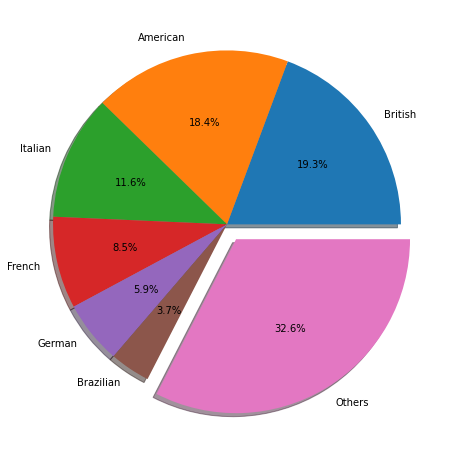

In [ ]:
dr = drivers[['nationality', 'driverId']].groupby('nationality').count().sort_values('driverId', ascending=False).reset_index()
dr1 = dr.loc[dr['driverId'] >= 30]
dr1.loc[len(dr1.index)] = ['Others', dr.driverId.sum() - dr1.driverId.sum()]
explode = [0,0,0,0,0,0,.1]
plt.figure(figsize=(8,8))
plt.pie(dr1.driverId, labels=dr1.nationality, autopct='%1.1f%%', shadow=True, explode=explode)
plt.show

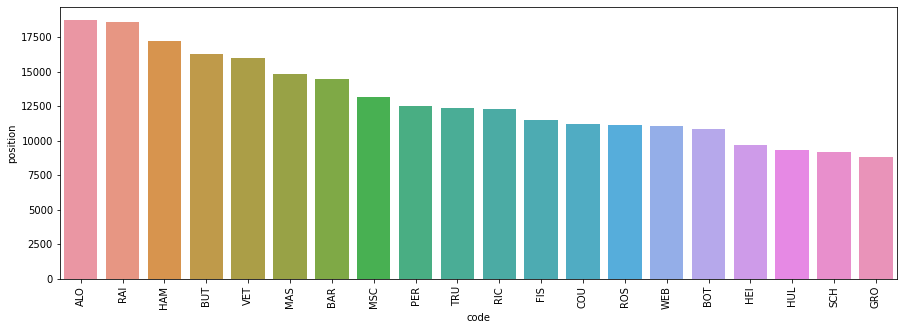

In [ ]:
laps = lap_times[['driverId', 'position', 'milliseconds']].merge(drivers[['driverId', 'driverRef']], on='driverId')
l = laps.groupby('driverId').count().sort_values('position', ascending=False).reset_index()
l = l.merge(drivers[['driverId', 'code']], on='driverId')

plt.figure(figsize=(15,5))
sns.barplot(data=l, x=l.code[:20], y=l.position[:20])
plt.xticks(rotation=90)
plt.show()

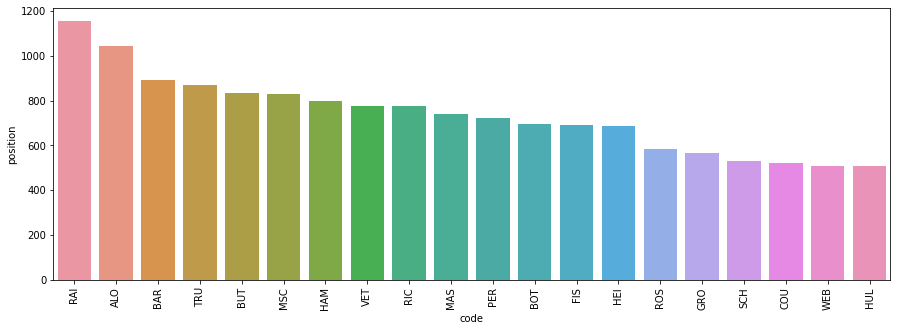

In [ ]:
laps = lap_times[['driverId', 'position', 'milliseconds']].merge(drivers[['driverId', 'driverRef']], on='driverId').loc[lap_times['position'] == 1]
l = laps.groupby('driverId').count().sort_values('position', ascending=False).reset_index()
l = l.merge(drivers[['driverId', 'code']], on='driverId')

plt.figure(figsize=(15,5))
sns.barplot(data=l, x=l.code[:20], y=l.position[:20])
plt.xticks(rotation=90)
plt.show()

In [ ]:
topDrivers = results[['raceId', 'points', 'driverId']].merge(drivers[['driverRef', 'driverId']], on='driverId').drop(['raceId', 'driverId'], axis=1).groupby('driverRef').sum().sort_values('points', ascending=False)[:50]
topDrivers = list(topDrivers.index)
res = results.merge(races, on='raceId')
res = res[['raceId', 'points', 'driverId', 'year']]

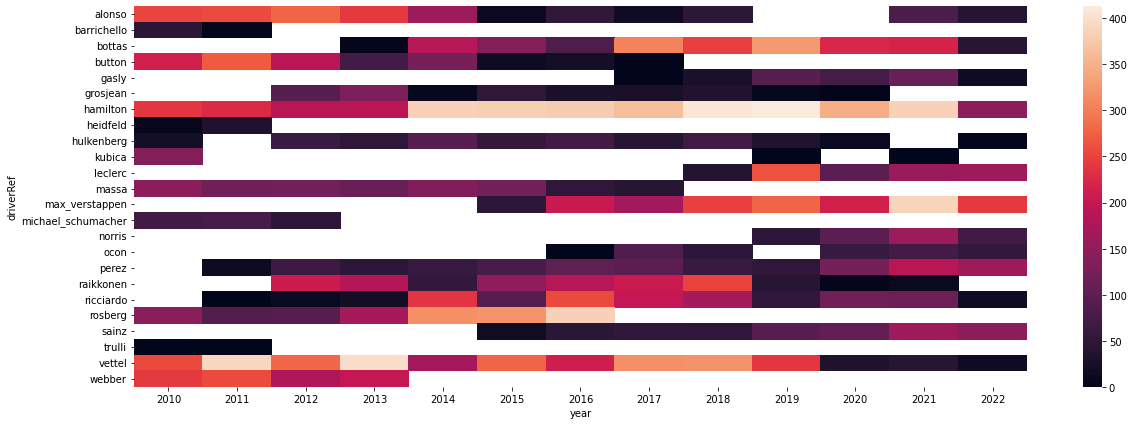

In [ ]:
points = res.merge(drivers[['driverRef', 'driverId']], on='driverId').drop(['raceId', 'driverId'], axis=1).set_index('driverRef')
#points = points.merge(constructors[['constructorId', 'name']], on='constructorId').drop(['raceId', 'constructorId'], axis=1).set_index('name')
points = points.loc[(points.index.isin(topDrivers)) & (points.year >= 2010)].reset_index()
p = pd.pivot_table(points , index = 'driverRef', columns = 'year' , values = 'points' , aggfunc= np.sum)
plt.figure(figsize=(20,7))
sns.heatmap(p,)

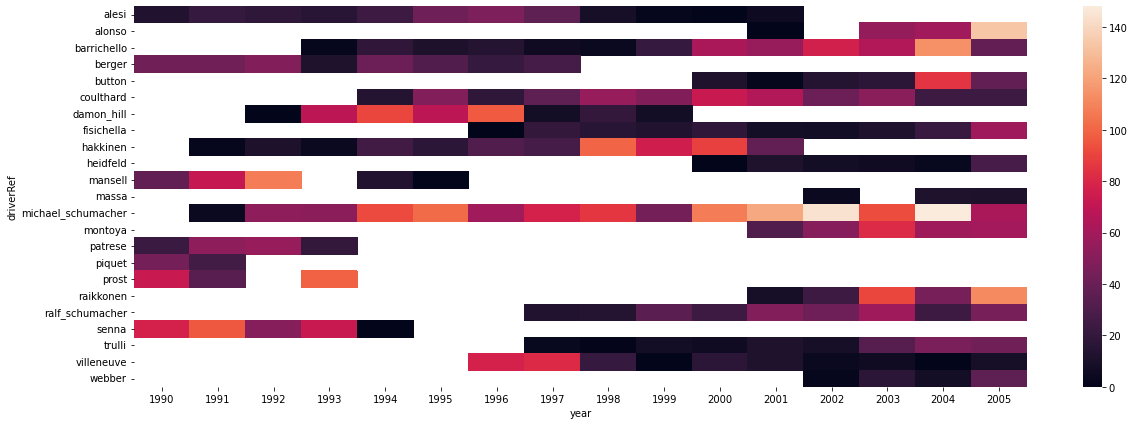

In [ ]:
points = res.merge(drivers[['driverRef', 'driverId']], on='driverId').drop(['raceId', 'driverId'], axis=1).set_index('driverRef')
points = points.loc[(points.index.isin(topDrivers)) & (points.year >= 1990) & (points.year < 2006)].reset_index()
p = pd.pivot_table(points , index = 'driverRef', columns = 'year' , values = 'points' , aggfunc= np.sum)
plt.figure(figsize=(20,7))
sns.heatmap(p,)

In [ ]:
qp = qualifying[['driverId', 'qual_position', 'best_q']].merge(drivers[['driverId', 'driverRef', 'code']], on='driverId')#.drop('driverId', axis=1)
p = qp.groupby('driverRef').count()
p = p[p['code']>40].reset_index()
p = p['driverRef'].unique()
qp = qp[qp['driverRef'].isin(p)]

In [ ]:
a = qp[qp['qual_position']==1].groupby('driverRef').count().sort_values('code', ascending=False).rename(columns={'code':'n_pole'}).reset_index()
qp = qp.merge(a[['driverRef', 'n_pole']], on='driverRef')
qp = qp.groupby('driverRef').agg(n_pole=('n_pole', 'max'), races=('qual_position', 'count'), code=('code', 'max')).sort_values('n_pole', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


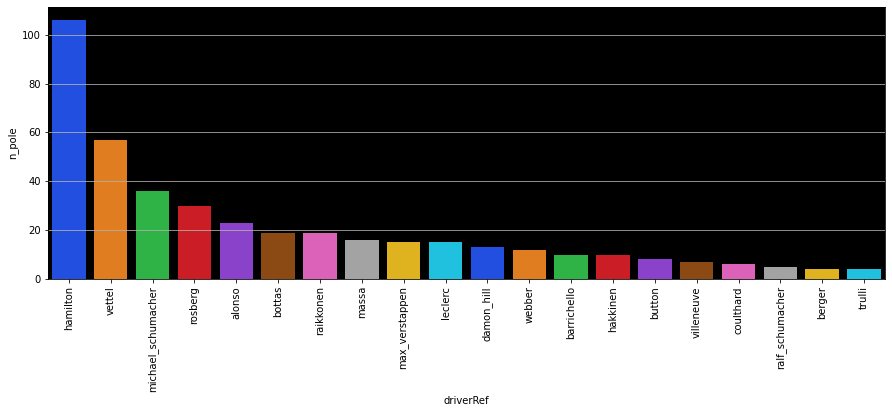

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=qp[:20], x=qp.index[:20], y='n_pole', palette='bright')
plt.xticks(rotation=90)
ax = plt.axes()
ax.set_facecolor('k')
ax.yaxis.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


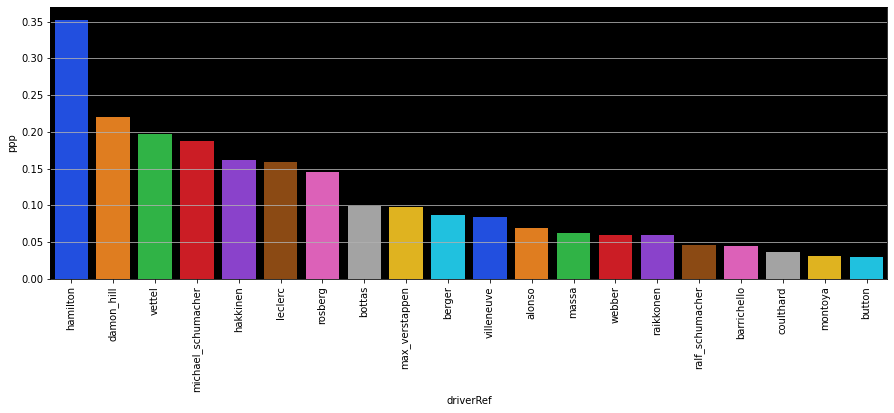

In [ ]:
qp['ppp'] = [x/y for x,y in zip(qp.n_pole, qp.races)]
qp.sort_values('ppp', ascending=False, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=qp[:20], x=qp.index[:20], y='ppp', palette='bright')
plt.xticks(rotation=90)
ax = plt.axes()
ax.set_facecolor('k')
ax.yaxis.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


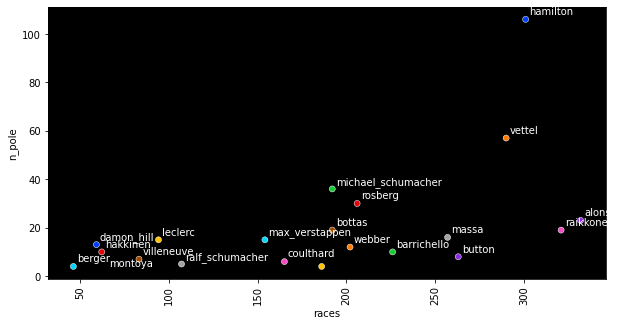

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=qp.sort_values('n_pole', ascending=False)[:20], x='races', y='n_pole', hue=qp.index[:20], palette='bright', legend=False)
plt.xticks(rotation=90)
ax = plt.axes()
ax.set_facecolor('k')
for i, txt in enumerate(qp.index[:20]):
    ax.annotate(txt, (qp.races[i]+2, qp.n_pole[i]+2), color='w')
plt.show()

# Teams analysis

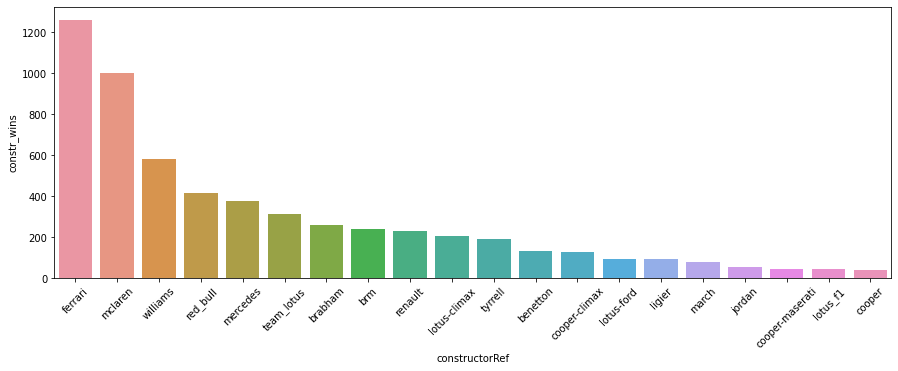

In [ ]:
df1 = df.loc[df.constr_wins > 0]
df1 = df1[['constructorRef', 'constr_wins',]].groupby('constructorRef').count().sort_values('constr_wins', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=df1, x=df1.index[:20], y=df1.constr_wins[:20])
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<function matplotlib.pyplot.show(*args, **kw)>

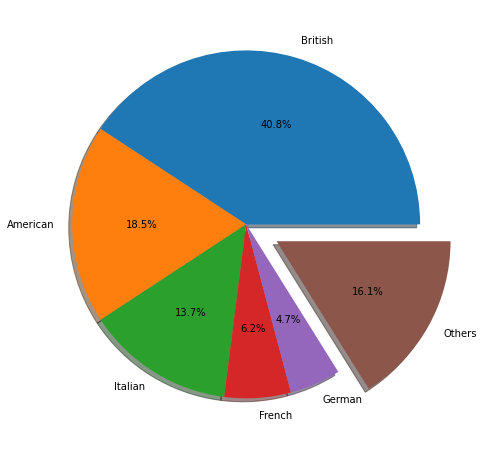

In [ ]:
co = constructors[['nationality', 'constructorId']].groupby('nationality').count().sort_values('constructorId', ascending=False).reset_index()
co1 = co.loc[co['constructorId'] >= 10]
co1.loc[len(co1.index)] = ['Others', co.constructorId.sum() - co1.constructorId.sum()]
explode = [0,0,0,0,0,.2]
plt.figure(figsize=(8,8))
plt.pie(co1.constructorId, labels=co1.nationality, autopct='%1.1f%%', shadow=True, explode=explode)
plt.show

In [ ]:
new_df = pd.merge(df, constr_standings,  how='left', left_on=['raceId','constructorId'], right_on = ['raceId','constructorId'])

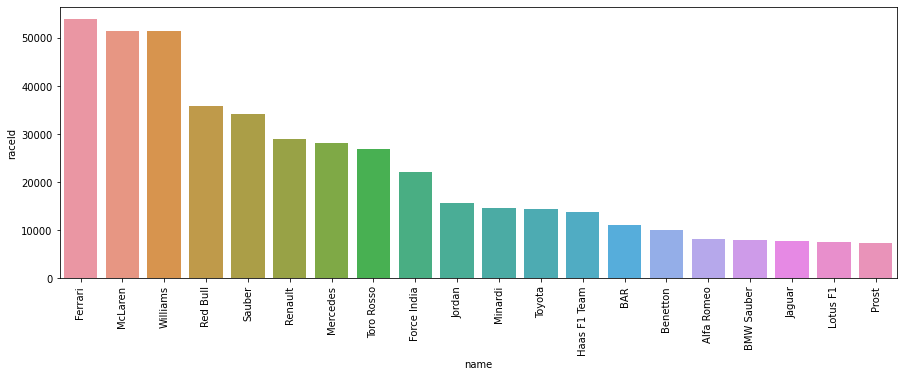

In [ ]:
laps = lap_times[['driverId', 'position', 'milliseconds']]#.merge(results[['driverId', 'raceId']], on='driverId')
laps = pd.merge(lap_times, results[['driverId', 'raceId', 'constructorId']], how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId'])
l = laps[['raceId', 'constructorId']].groupby('constructorId').count().sort_values('raceId', ascending=False).reset_index()
l = l.merge(constructors[['constructorId', 'name']], on='constructorId')

plt.figure(figsize=(15,5))
sns.barplot(data=l, x=l.name[:20], y=l.raceId[:20])
plt.xticks(rotation=90)
plt.show()

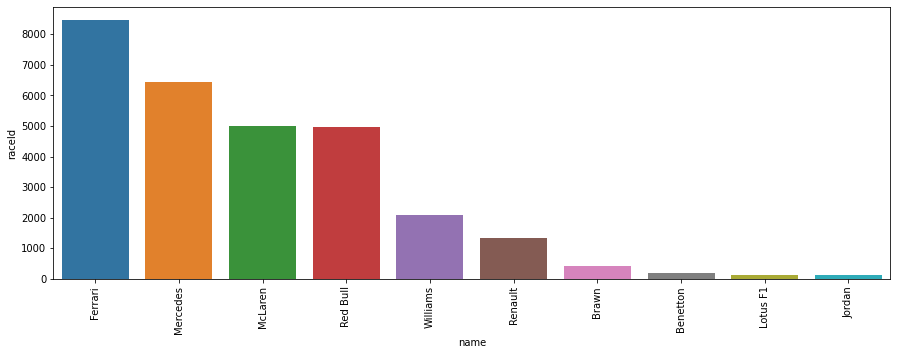

In [ ]:
laps = lap_times[['driverId', 'position', 'milliseconds']]
laps = pd.merge(lap_times, results[['driverId', 'raceId', 'constructorId']], how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId']).loc[laps['position'] == 1]
l = laps[['raceId', 'constructorId']].groupby('constructorId').count().sort_values('raceId', ascending=False).reset_index()
l = l.merge(constructors[['constructorId', 'name']], on='constructorId')

plt.figure(figsize=(15,5))
sns.barplot(data=l, x=l.name[:10], y=l.raceId[:10])
plt.xticks(rotation=90)
plt.show()

In [ ]:
results

raceId  driverId  constructorId  positionOrder  race_duration_s  \
0          18         1              1              1             5691   
1          18         2              2              2             5696   
2          18         3              3              3             5699   
3          18         4              4              4             5708   
4          18         5              1              5             5709   
...       ...       ...            ...            ...              ...   
25655    1086       825            210             16                0   
25656    1086       848              3             17                0   
25657    1086       849              3             18                0   
25658    1086       852            213             19                0   
25659    1086       822             51             20                0   

       fastestLapTime  points  fastestLapSpeed  
0              87.452    10.0              218  
1              87.739     8.0              218  
2              88.090     6.0              217  
3              88.603     5.0              215  
4              87.418     4.0              218  
...               ...     ...              ...  
25655          83.511     0.0              189  
25656          83.047     0.0              190  
25657          82.478     0.0              191  
25658          83.538     0.0              189  
25659          84.002     0.0              188  

[25660 rows x 8 columns]

In [ ]:
topConstr = results[['raceId', 'points', 'constructorId']].merge(constructors[['name', 'constructorId']], on='constructorId').drop(['raceId', 'constructorId'], axis=1).groupby('name').sum().sort_values('points', ascending=False)[:20]
topConstr = list(topConstr.index)
res = results.merge(races, on='raceId')
res = res[['raceId', 'points', 'constructorId', 'year']]

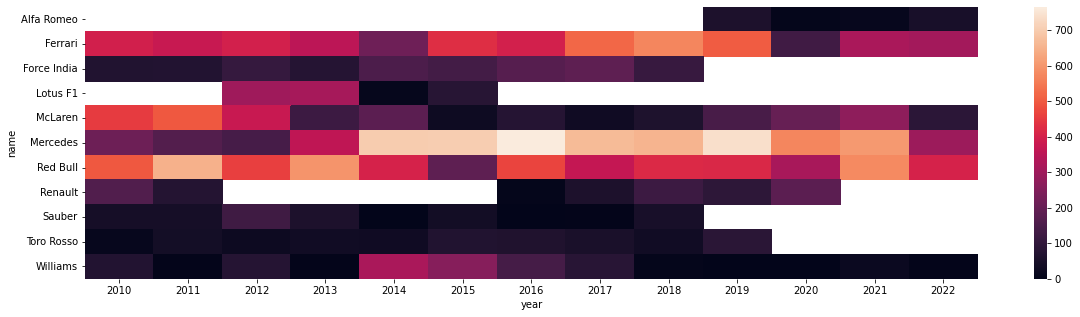

In [ ]:
points = results[['raceId', 'points', 'constructorId']].merge(races[['year', 'raceId']], on='raceId')
points = points.merge(constructors[['constructorId', 'name']], on='constructorId').drop(['raceId', 'constructorId'], axis=1).set_index('name')
points = points.loc[(points.index.isin(topConstr)) & (points.year >= 2010)]
p = pd.pivot_table(points , index = 'name', columns = 'year' , values = 'points' , aggfunc= np.sum)
plt.figure(figsize=(20,5))
sns.heatmap(p,)

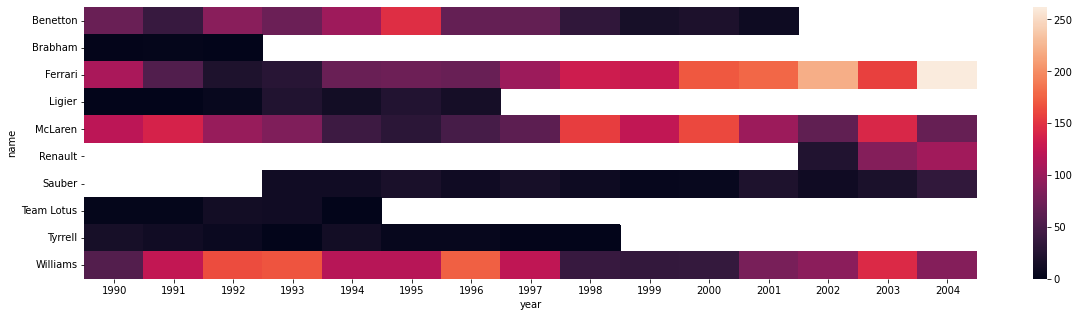

In [ ]:
points = results[['raceId', 'points', 'constructorId']].merge(races[['year', 'raceId']], on='raceId')
points = points.merge(constructors[['constructorId', 'name']], on='constructorId').drop(['raceId', 'constructorId'], axis=1).set_index('name')
points = points.loc[(points.index.isin(topConstr)) & (points.year >= 1990) & (points.year < 2005)]
p = pd.pivot_table(points , index = 'name', columns = 'year' , values = 'points' , aggfunc= np.sum)
plt.figure(figsize=(20,5))
sns.heatmap(p,)

# Circuits analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


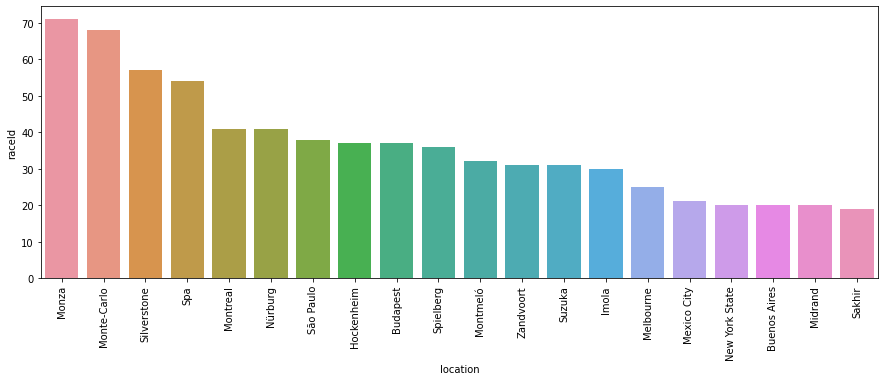

In [ ]:
a = pd.DataFrame(df.groupby('location').raceId.nunique())
a.sort_values('raceId', ascending=False, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(a.index[:20], a.raceId[:20])
plt.xticks(rotation=90)
plt.show()

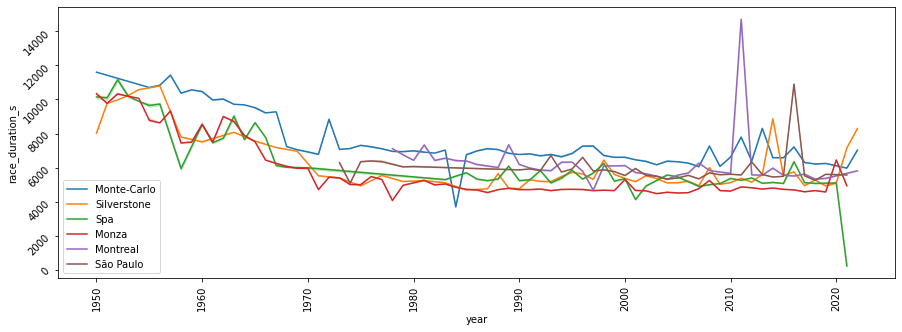

In [ ]:
migliori = ['Monte-Carlo', 'Silverstone', 'Spa', 'Monza', 'Montreal', 'São Paulo']

plt.figure(figsize=(15,5))
for i in range(6):
  rr = df.loc[(df['location'] == migliori[i]) & (df['race_duration_s'] > 0)]
  sns.lineplot(x=rr['year'], y=rr['race_duration_s'], label=migliori[i])
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.legend()

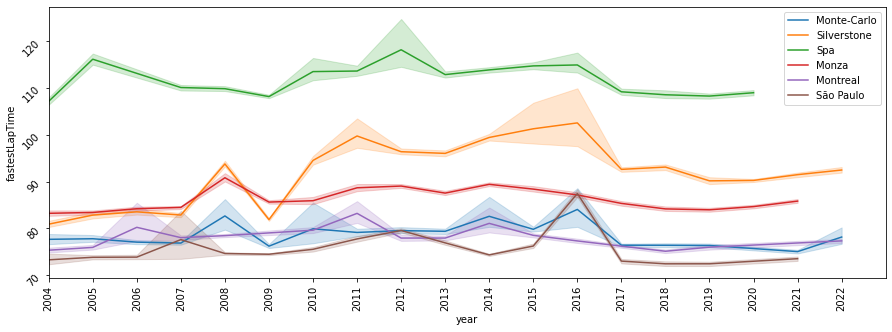

In [ ]:
plt.figure(figsize=(15,5))
for i in range(6):
  rr = df.loc[(df['location'] == migliori[i]) & (df['fastestLapTime'] > 0)]
  sns.lineplot(x=rr['year'], y=rr['fastestLapTime'], label=migliori[i])
plt.yticks(rotation=45)
plt.xticks(rotation=90)
plt.xticks(range(2004, 2023, 1))
plt.xlim(2004, 2023)
plt.legend()

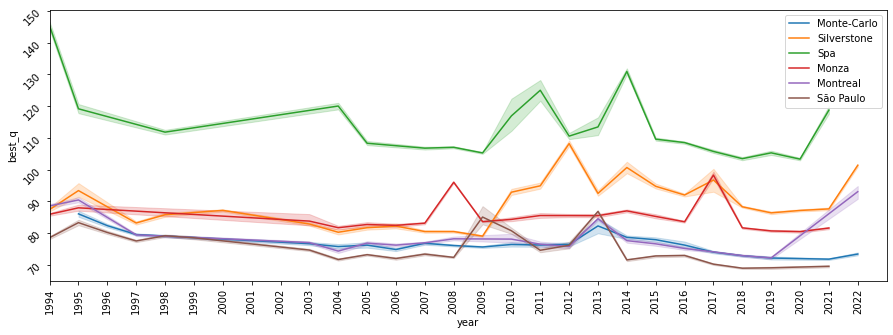

In [ ]:
plt.figure(figsize=(15,5))
for i in range(6):
  rr = df.loc[(df['location'] == migliori[i]) & (df['best_q'] > 0)]
  sns.lineplot(x=rr['year'], y=rr['best_q'], label=migliori[i])
plt.yticks(rotation=45)
plt.xticks(rotation=90)
plt.xticks(range(1993, 2023, 1))
plt.xlim(1994, 2023)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


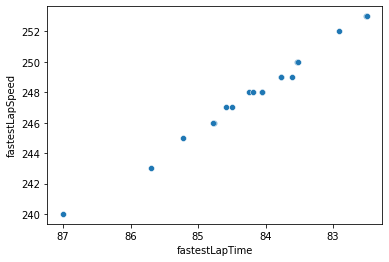

In [ ]:
c = 'Monza'
a = 2018
res = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
res = res.loc[(res['location'] == c) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
res = res.loc[(res['fastestLapTime'] > 0) & (res['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
sns.scatterplot(res.fastestLapTime, res.fastestLapSpeed)
plt.gca().invert_xaxis()

In [ ]:
anno = 2018
names = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
names = names[['year', 'location']].loc[names['year'] == anno]
names = list(names['location'].unique())

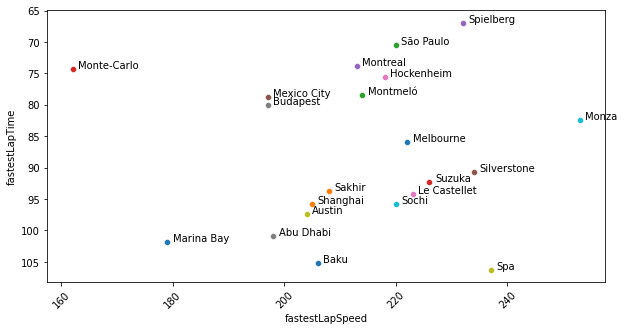

In [ ]:
c = 'Monza'
a = 2018

names = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
names = names[['year', 'location']].loc[names['year'] == a]
names = list(names['location'].unique())

res = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'driverId'], axis=1)
plt.figure(figsize=(10,5))
for circ in names:
  r = res.loc[(res['fastestLapTime'] > 0) & (res['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  r = r.loc[(r['location'] == circ) & (r['year'] == a)].groupby('raceId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  sns.scatterplot(data=r, x='fastestLapSpeed', y='fastestLapTime')
  plt.annotate(circ, (r.fastestLapSpeed+1, r.fastestLapTime-.1))
  plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.show()

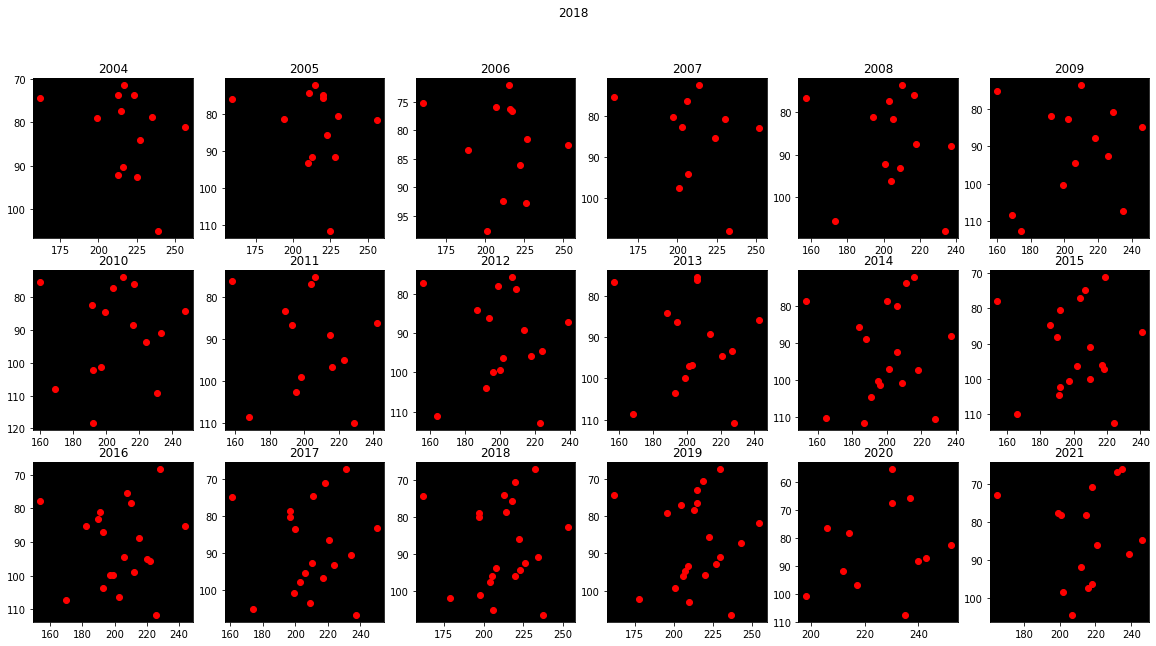

In [ ]:
c = 'Monza'
a = 2018

names = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
names = names[['year', 'location']].loc[names['year'] == a]
names = list(names['location'].unique())

#res = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'driverId'], axis=1)

fig, axs = plt.subplots(3,6, figsize=(20, 10))
axs = axs.ravel()

for i, y in enumerate(range(2004,2022)):
  for circ in names:
    r = res.loc[(res['fastestLapTime'] > 0) & (res['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
    r = r.loc[(r['location'] == circ) & (r['year'] == y)].groupby('raceId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
    axs[i].scatter(r.fastestLapSpeed, r.fastestLapTime, c='r')
    #plt.annotate(circ, (r.fastestLapSpeed+1, r.fastestLapTime-.1))
    axs[i].set_title(y)
    axs[i].set_facecolor('k')
    axs[i].invert_yaxis()
plt.suptitle(a)
plt.show()

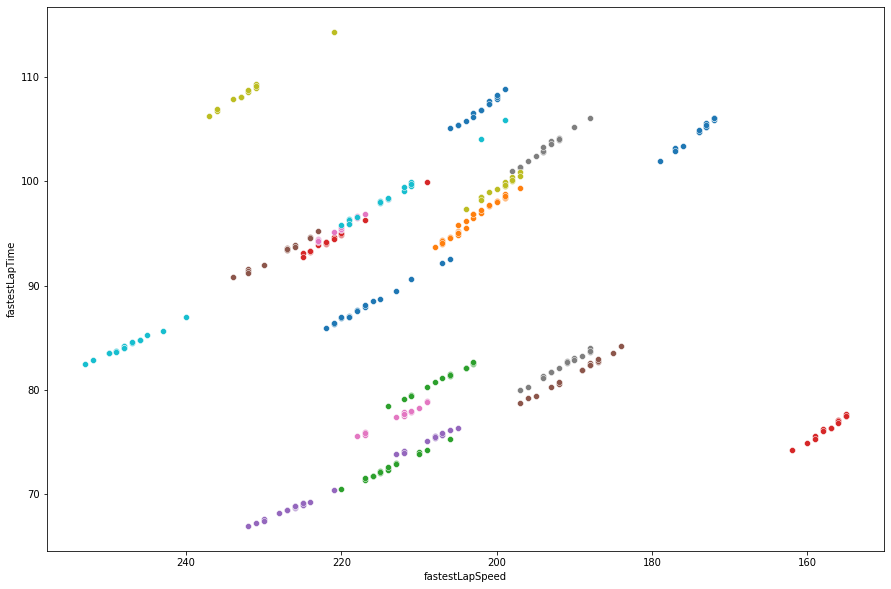

In [ ]:
c = 'Monza'
a = 2018
res = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
plt.figure(figsize=(15,10))
for circ in names:
  r = res.loc[(res['location'] == circ) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  r = r.loc[(res['fastestLapTime'] > 0) & (r['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  sns.scatterplot(data=r, x='fastestLapSpeed', y='fastestLapTime')
  plt.gca().invert_xaxis()

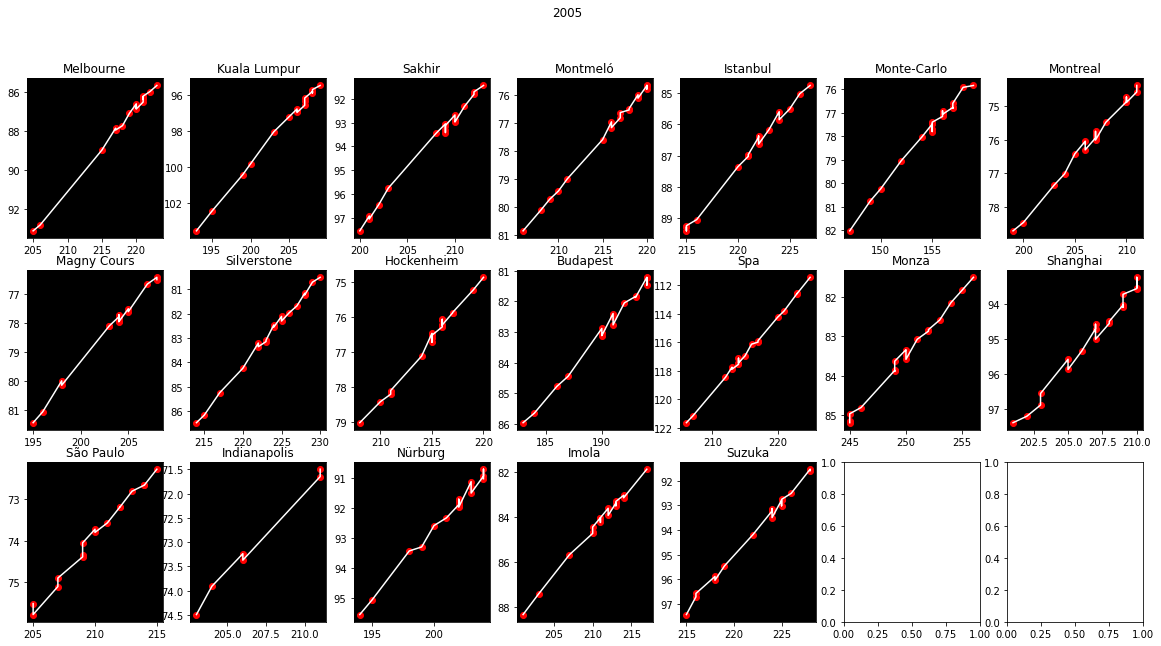

In [ ]:
c = 'Monza'
a = 2005

names = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
names = names[['year', 'location']].loc[names['year'] == a]
names = list(names['location'].unique())

fig, axs = plt.subplots(3,7, figsize=(20, 10))
axs = axs.ravel()

for i, c in enumerate(names):
  r = res.loc[(res['location'] == c) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  r = r.loc[(res['fastestLapTime'] > 0) & (r['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  axs[i].scatter(data=r, x='fastestLapSpeed', y='fastestLapTime', c='r')
  axs[i].plot(r.fastestLapSpeed, r.fastestLapTime, 'w')
  axs[i].set_title(c)
  axs[i].set_facecolor('k')
  axs[i].invert_yaxis()

plt.suptitle(a)
plt.show() 

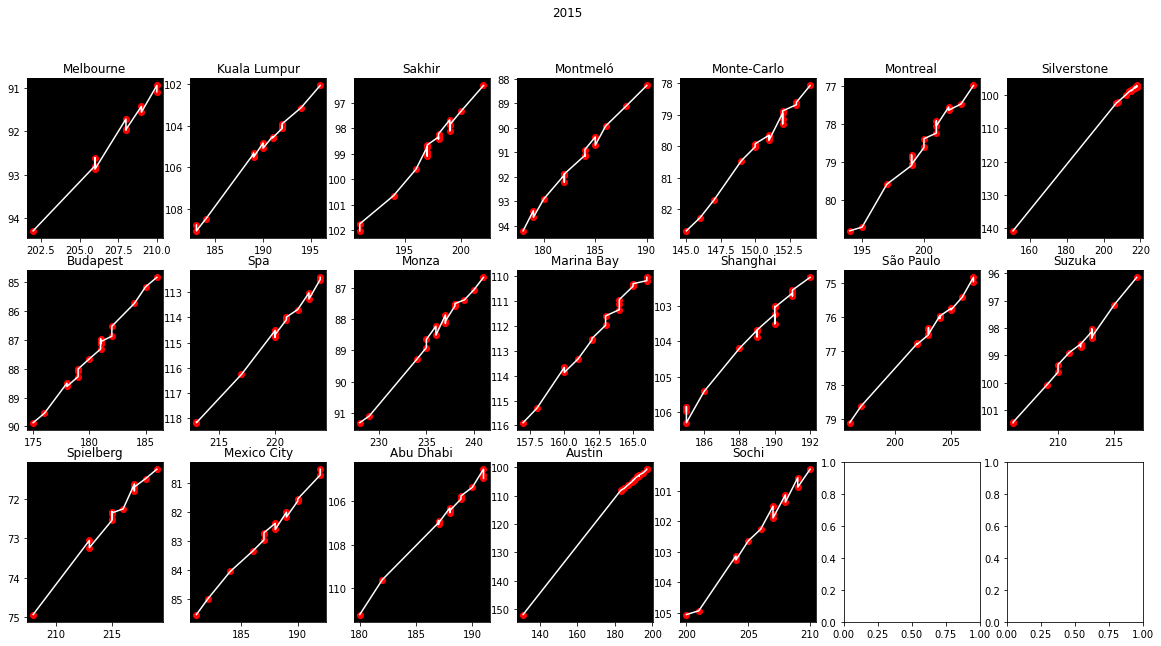

In [ ]:
c = 'Monza'
a = 2015

names = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
names = names[['year', 'location']].loc[names['year'] == a]
names = list(names['location'].unique())

fig, axs = plt.subplots(3,7, figsize=(20, 10))
axs = axs.ravel()

for i, c in enumerate(names):
  r = res.loc[(res['location'] == c) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  r = r.loc[(res['fastestLapTime'] > 0) & (r['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  axs[i].scatter(data=r, x='fastestLapSpeed', y='fastestLapTime', c='r')
  axs[i].plot(r.fastestLapSpeed, r.fastestLapTime, 'w')
  axs[i].set_title(c)
  axs[i].set_facecolor('k')
  axs[i].invert_yaxis()

plt.suptitle(a)
plt.show() 

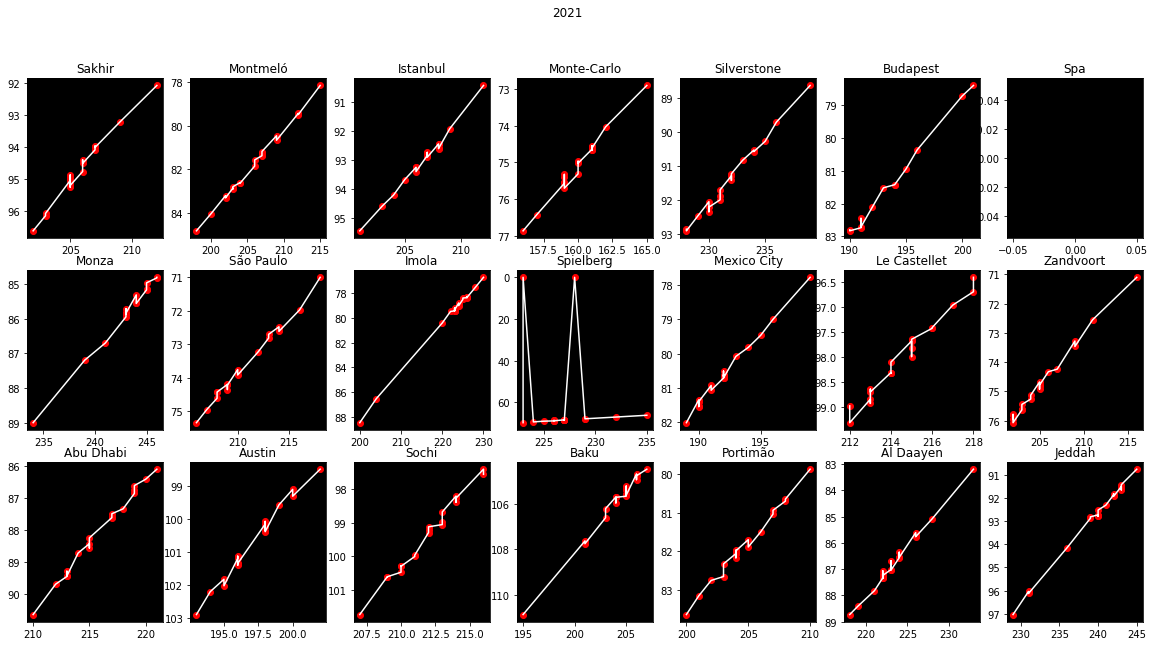

In [ ]:
c = 'Monza'
a = 2021

names = results[['raceId', 'driverId', 'fastestLapTime', 'fastestLapSpeed']].merge(races[['circuitId', 'raceId', 'year']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').drop(['circuitId', 'raceId'], axis=1)
names = names[['year', 'location']].loc[names['year'] == a]
names = list(names['location'].unique())

fig, axs = plt.subplots(3,7, figsize=(20, 10))
axs = axs.ravel()

for i, c in enumerate(names):
  r = res.loc[(res['location'] == c) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  r = r.loc[(res['fastestLapTime'] > 0) & (r['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  axs[i].scatter(data=r, x='fastestLapSpeed', y='fastestLapTime', c='r')
  axs[i].plot(r.fastestLapSpeed, r.fastestLapTime, 'w')
  axs[i].set_title(c)
  axs[i].set_facecolor('k')
  axs[i].invert_yaxis()

plt.suptitle(a)
plt.show() 

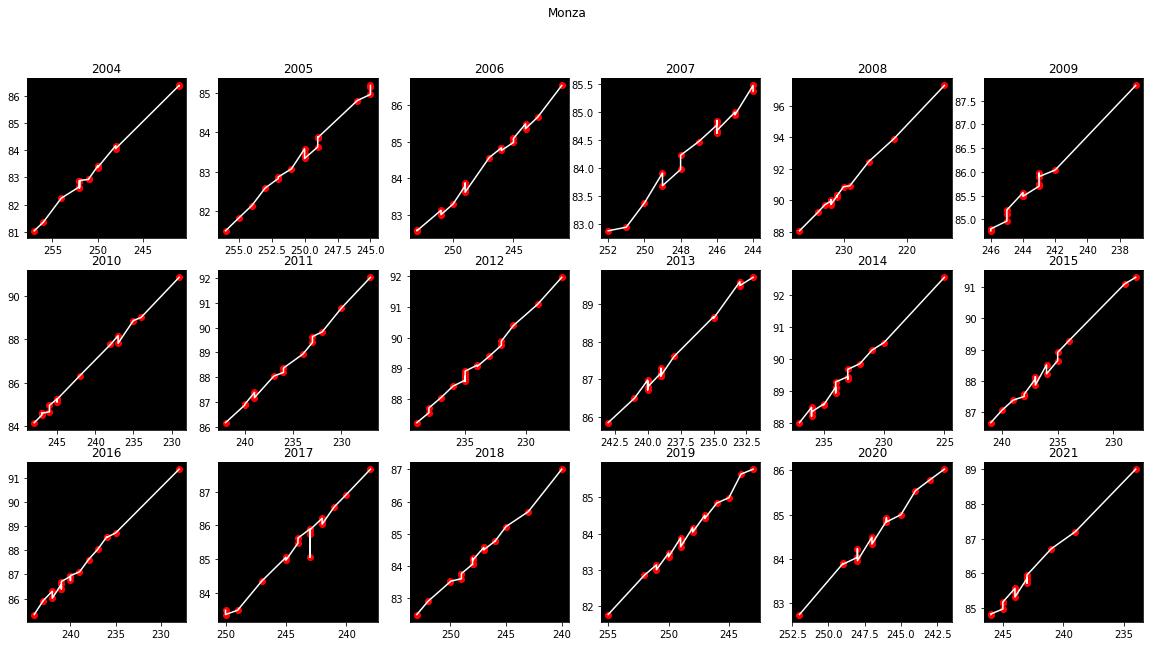

In [ ]:
c = 'Monza'
a = 2018

fig, axs = plt.subplots(3,6, figsize=(20, 10))
axs = axs.ravel()

for i, a in enumerate(list(range(2004, 2022))):
  r = res.loc[(res['location'] == c) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  r = r.loc[(res['fastestLapTime'] > 0) & (r['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  axs[i].scatter(data=r, x='fastestLapSpeed', y='fastestLapTime', c='r')
  axs[i].plot(r.fastestLapSpeed, r.fastestLapTime, 'w')
  axs[i].set_title(a)
  axs[i].invert_xaxis()
  axs[i].set_facecolor('k')
plt.suptitle('Monza')
plt.show() 

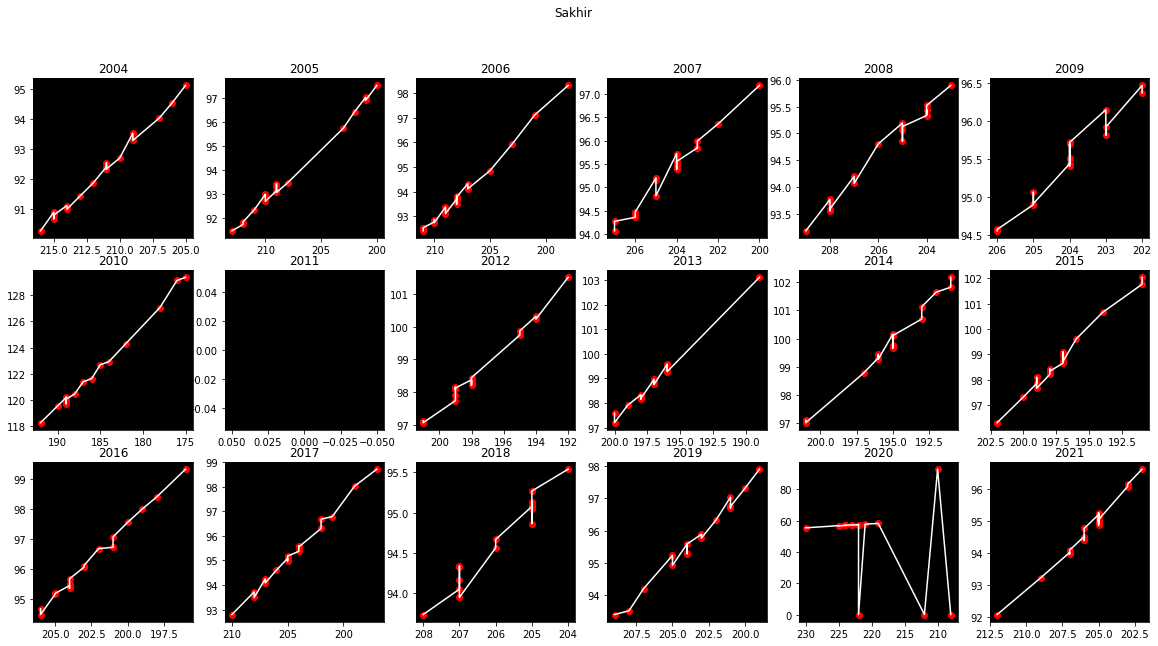

In [ ]:
c = 'Sakhir'
a = 2018

fig, axs = plt.subplots(3,6, figsize=(20, 10))
axs = axs.ravel()

for i, a in enumerate(list(range(2004, 2022))):
  r = res.loc[(res['location'] == c) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  r = r.loc[(res['fastestLapTime'] > 0) & (r['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  axs[i].scatter(data=r, x='fastestLapSpeed', y='fastestLapTime', c='r')
  axs[i].plot(r.fastestLapSpeed, r.fastestLapTime, 'w')
  axs[i].set_title(a)
  axs[i].invert_xaxis()
  axs[i].set_facecolor('k')
plt.suptitle(c)
plt.show() 

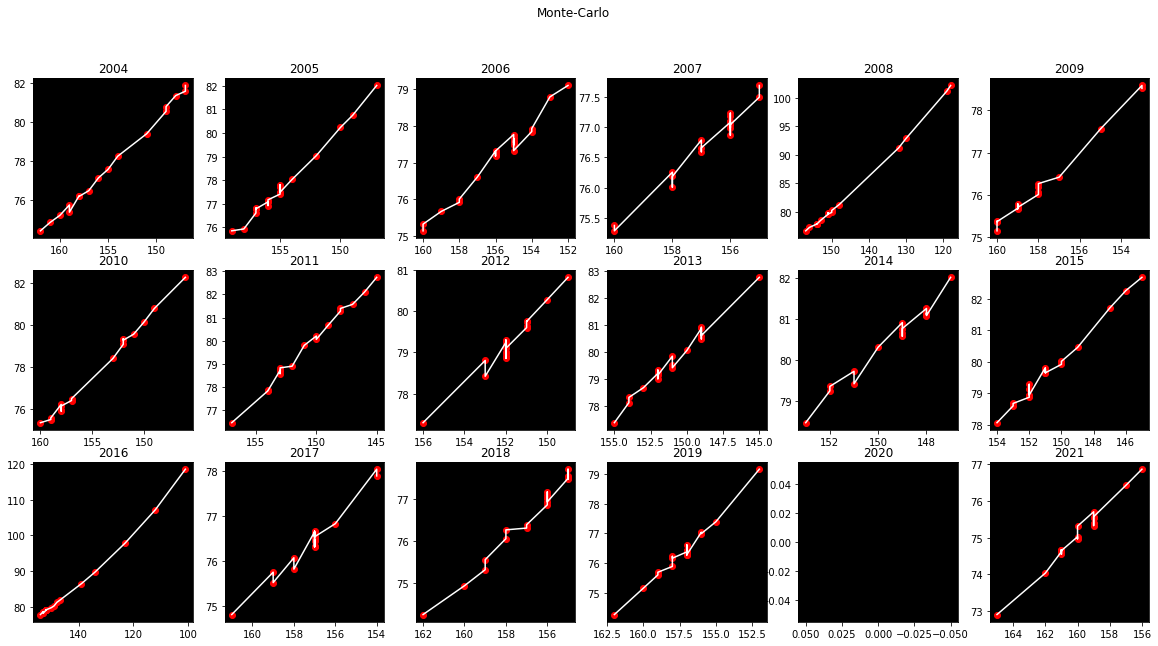

In [ ]:
c = 'Monte-Carlo'
a = 2018

fig, axs = plt.subplots(3,6, figsize=(20, 10))
axs = axs.ravel()

for i, a in enumerate(list(range(2004, 2022))):
  r = res.loc[(res['location'] == c) & (res['year'] == a)].groupby('driverId').agg({'fastestLapTime':'min', 'fastestLapSpeed':'max'})
  r = r.loc[(res['fastestLapTime'] > 0) & (r['fastestLapSpeed'] > 0)].sort_values('fastestLapSpeed', ascending='False')
  axs[i].scatter(data=r, x='fastestLapSpeed', y='fastestLapTime', c='r')
  axs[i].plot(r.fastestLapSpeed, r.fastestLapTime, 'w')
  axs[i].set_title(a)
  axs[i].invert_xaxis()
  axs[i].set_facecolor('k')
plt.suptitle(c)
plt.show() 

In [ ]:
res = results[['raceId', 'driverId', 'constructorId', 'positionOrder']].merge(races[['circuitId', 'raceId']], on='raceId').merge(circuits[['circuitId', 'location']], on='circuitId').merge(drivers[['driverId', 'driverRef']], on='driverId').merge(constructors[['constructorId', 'name']], on='constructorId').drop(['circuitId', 'raceId', 'driverId', 'constructorId'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


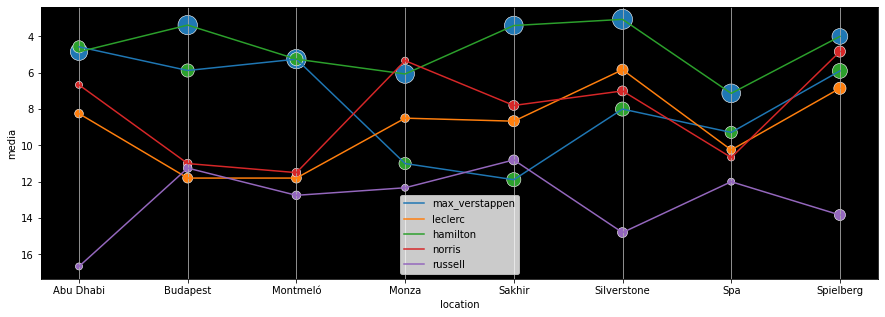

In [ ]:
r = races.loc[races['year']>2017].groupby('circuitId').count().sort_values('raceId', ascending=False).reset_index()
r = r.loc[r['raceId'] >= 5].merge(circuits[['circuitId', 'location']], how='inner')
circ = list(r['location'])

plt.figure(figsize=(15,5))
ci = res.loc[(res['location'].isin(circ)) & (res['driverRef'].isin(top5driv))].drop('name', axis=1).groupby(['driverRef', 'location']).agg(pilot=('driverRef', 'max'), somma=('positionOrder', 'count'), media=('positionOrder', 'mean'))
sns.scatterplot(data=ci, x='location', y='media', size='somma', sizes=(50, 400), hue='pilot', legend=False)
for d in top5driv:
  w = res.loc[res['driverRef']== d]
  w = w.loc[w['location'].isin(circ)].groupby('location').agg(driver=('driverRef', 'max'), somma=('positionOrder', 'count'), media=('positionOrder', 'mean'))
  w.reset_index(inplace=True)
  sns.lineplot(data=w, x=w.location, y=w.media, label=d)
ax = plt.axes()
ax.invert_yaxis()
ax.set_facecolor('k')
ax.xaxis.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


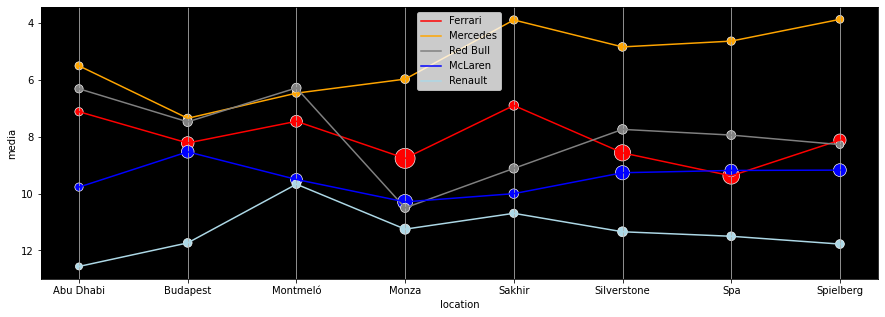

In [ ]:
topTeams = ['Ferrari', 'Mercedes', 'Red Bull', 'McLaren', 'Renault']
palette = ['r', 'orange', 'grey', 'b', 'lightblue']
palette2 = ['r', 'b', 'orange', 'grey', 'lightblue']
r = races.loc[races['year']>2017].groupby('circuitId').count().sort_values('raceId', ascending=False).reset_index()
r = r.loc[r['raceId'] >= 5].merge(circuits[['circuitId', 'location']], how='inner')
circ = list(r['location'])

plt.figure(figsize=(15,5))
ci = res.loc[(res['location'].isin(circ)) & (res['name'].isin(topTeams))].drop('driverRef', axis=1).groupby(['name', 'location']).agg(team=('name', 'max'), somma=('positionOrder', 'count'), media=('positionOrder', 'mean'))
sns.scatterplot(data=ci, x='location', y='media', size='somma', sizes=(50, 400), hue='team', palette=palette2, legend=False)
for i, t in enumerate(topTeams):
  w = res.loc[res['name']== t]
  w = w.loc[w['location'].isin(circ)].groupby('location').agg(team=('name', 'max'), somma=('positionOrder', 'count'), media=('positionOrder', 'mean'))
  w.reset_index(inplace=True)
  sns.lineplot(data=w, x=w.location, y=w.media, label=t, color=palette[i])
ax = plt.axes()
ax.invert_yaxis()
ax.set_facecolor('k')
ax.xaxis.grid()
plt.show()

# Cars analysis

ferrari2022
mercedes 2020
mercedes2016
redbull2013
brawn2009
ferrari2002
benetton1995
williams1992
mclaren1988
brabham78
lotus1972

In [ ]:
races

raceId  year  circuitId
0          1  2009          1
1          2  2009          2
2          3  2009         17
3          4  2009          3
4          5  2009          4
...      ...   ...        ...
1074    1092  2022         22
1075    1093  2022         69
1076    1094  2022         32
1077    1095  2022         18
1078    1096  2022         24

[1079 rows x 3 columns]

In [ ]:
res = results[['raceId', 'constructorId', 'positionOrder', 'race_duration_s']]\
  .merge(constructors[['constructorId', 'name']], on='constructorId')\
  .merge(races[['raceId', 'year', 'circuitId']], on='raceId')\
  .drop(['constructorId'], axis=1)
res.head(1)

raceId  positionOrder  race_duration_s     name  year  circuitId
0      18              1             5691  McLaren  2008          1

In [ ]:
topCars = ['Mercedes', 'Mercedes', 'Red Bull', 'Brawn', 'Ferrari', 'Williams', 'McLaren']
anni = [2020, 2016, 2013, 2009, 2002, 1992, 1988]
circuiti = ['Monza', 'Monte-Carlo', 'Spa', 'Silverstone']

In [ ]:
order = []
duration = []
team = []
anno = []
rc = []
cr = []

for c,y in zip(topCars, anni):
  d = res.loc[(res['name']== c) & (res['year']== y)]
  order += list(d.positionOrder)
  duration += list(d.race_duration_s)
  team += list(d.name)
  anno += list(d.year)
  rc += list(d.raceId)
  cr += list(d.circuitId)

cy = pd.DataFrame({'positionOrder': order, 
                   'race_duration-s': duration, 
                   'name': team, 
                   'year': anno,
                   'raceId': rc,
                   'circuitId': cr})
cy['car'] = [x + str(y) for x,y in zip(cy.name, cy.year)]
#cy.drop(['name', 'year'], axis=1, inplace=True)
cy.tail(1)

positionOrder  race_duration-s     name  year  raceId  circuitId  \
245              2             6831  McLaren  1988     387         29   

             car  
245  McLaren1988

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


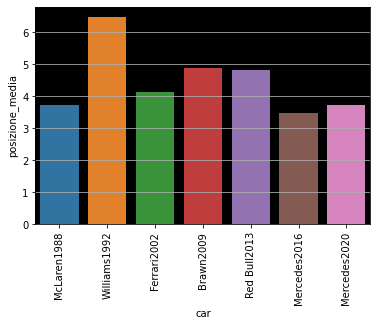

In [ ]:
f = cy.groupby('year').agg(team=('name', 'max'), posizione_media=('positionOrder', 'mean')).sort_values('year').reset_index()
f['car'] = [x + str(y) for x,y in zip(f.team, f.year)]

sns.barplot(data=f, x=f.car, y=f.posizione_media)
plt.xticks(rotation=90)
ax = plt.axes()
ax.set_facecolor('k')
ax.yaxis.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


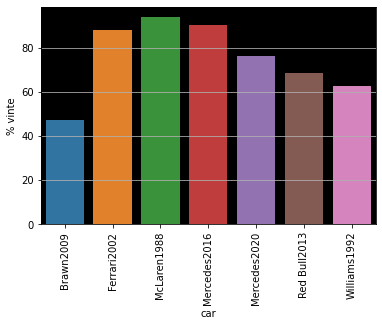

In [ ]:
firsts = cy[cy['positionOrder']==1].groupby('car').count()#.reset_index()
rcs = cy.groupby('car').count()#.reset_index()
rf = rcs[['name']].join(firsts['positionOrder'])
rf['% vinte'] = [(x/y)*200 for x,y in zip(rf.positionOrder, rf.name)]

sns.barplot(data=rf, x=rf.index, y=rf['% vinte'])
plt.xticks(rotation=90)
ax = plt.axes()
ax.set_facecolor('k')
ax.yaxis.grid()
plt.show()

In [ ]:
td = cy[['circuitId', 'car', 'race_duration-s', 'year']].merge(circuits[['circuitId', 'location']], on='circuitId')
td = td[td['race_duration-s']>0].drop('circuitId', axis=1)

In [ ]:
circ = {}
for c in td.location.unique():
  l = len(td[td['location'] == c].car.unique())
  circ[c] = l

circ = sorted(circ.items(), key=lambda kv: kv[1])[-6:]
circ = [x[0] for x in circ]
circ

['Monza', 'Monte-Carlo', 'Suzuka', 'Budapest', 'Silverstone', 'Spa']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


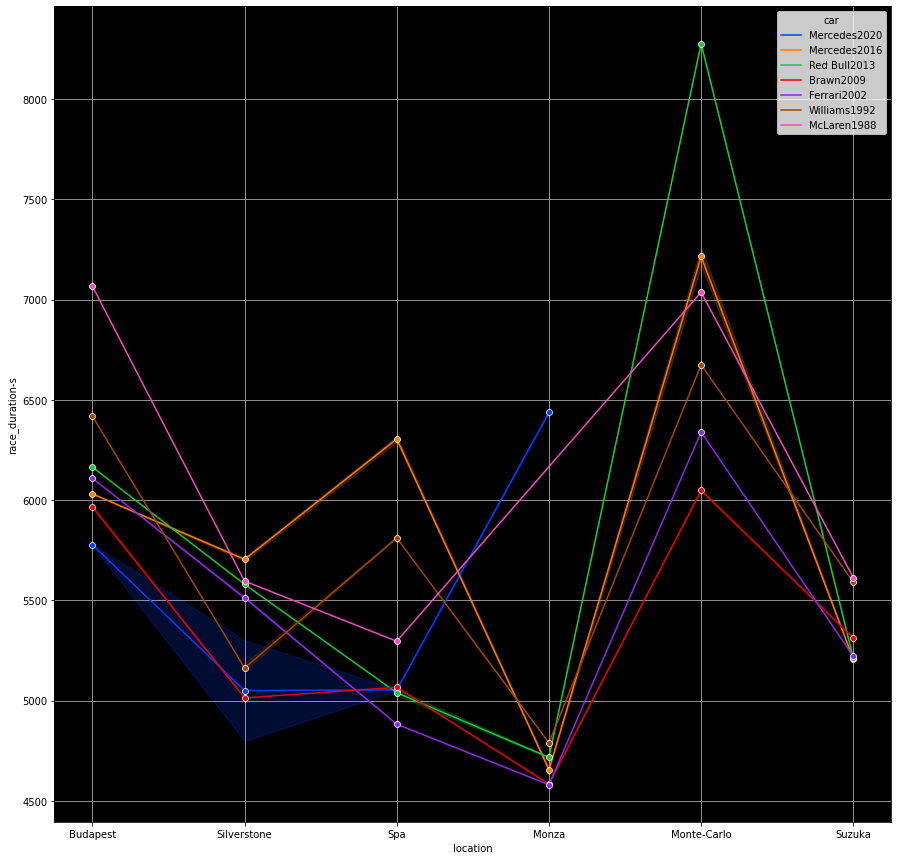

In [ ]:
td = td[td['location'].isin(circ)]
#td['location'] = pd.Categorical(td['location'],
#                                   categories=['Monza', 'Monte-Carlo', 'Suzuka', 'Budapest', 'Silverstone', 'Spa'],
#                                   ordered=True)
plt.figure(figsize=(15,15))
sns.lineplot(data=td, x='location', y='race_duration-s', hue='car', marker='o', palette='bright', sort=True)
ax = plt.axes()
ax.set_facecolor('k')
ax.xaxis.grid()
ax.yaxis.grid()
plt.show()

In [ ]:
laps = lap_times[['raceId', 'position', 'milliseconds', 'lap']].merge(cy[['raceId', 'car', 'circuitId', 'year']], on='raceId')
laps = laps.merge(circuits[['circuitId', 'location']], on='circuitId')
laps[(laps['car']=='Mercedes2020') & (laps['location']=='Monza') & (laps['lap']==27)].sort_values('milliseconds', ascending=False)#.groupby('location').year.nunique()#.sort_values('car')

raceId  position  milliseconds  lap           car  circuitId  year  \
113520    1038         6       1685363   27  Mercedes2020         14  2020   
113521    1038         6       1685363   27  Mercedes2020         14  2020   
115123    1038         9       1683067   27  Mercedes2020         14  2020   
115122    1038         9       1683067   27  Mercedes2020         14  2020   
114323    1038         3       1682826   27  Mercedes2020         14  2020   
114322    1038         3       1682826   27  Mercedes2020         14  2020   
114535    1038         4       1682502   27  Mercedes2020         14  2020   
114534    1038         4       1682502   27  Mercedes2020         14  2020   
113415    1038         1       1682497   27  Mercedes2020         14  2020   
113414    1038         1       1682497   27  Mercedes2020         14  2020   
114686    1038         5       1682496   27  Mercedes2020         14  2020   
114687    1038         5       1682496   27  Mercedes2020         14  2020   
115005    1038        15       1682425   27  Mercedes2020         14  2020   
115004    1038        15       1682425   27  Mercedes2020         14  2020   
114793    1038        16       1682347   27  Mercedes2020         14  2020   
114792    1038        16       1682347   27  Mercedes2020         14  2020   
114217    1038        12       1682247   27  Mercedes2020         14  2020   
114216    1038        12       1682247   27  Mercedes2020         14  2020   
114110    1038         2       1682062   27  Mercedes2020         14  2020   
114111    1038         2       1682062   27  Mercedes2020         14  2020   
114050    1038        11       1681901   27  Mercedes2020         14  2020   
114051    1038        11       1681901   27  Mercedes2020         14  2020   
114428    1038        13       1681588   27  Mercedes2020         14  2020   
114429    1038        13       1681588   27  Mercedes2020         14  2020   
113732    1038        14       1681313   27  Mercedes2020         14  2020   
113733    1038        14       1681313   27  Mercedes2020         14  2020   
113627    1038         7       1681270   27  Mercedes2020         14  2020   
113626    1038         7       1681270   27  Mercedes2020         14  2020   
113838    1038        10       1681241   27  Mercedes2020         14  2020   
113839    1038        10       1681241   27  Mercedes2020         14  2020   
113945    1038         8       1681176   27  Mercedes2020         14  2020   
113944    1038         8       1681176   27  Mercedes2020         14  2020   
114898    1038        17       1681001   27  Mercedes2020         14  2020   
114899    1038        17       1681001   27  Mercedes2020         14  2020   

       location  
113520    Monza  
113521    Monza  
115123    Monza  
115122    Monza  
114323    Monza  
114322    Monza  
114535    Monza  
114534    Monza  
113415    Monza  
113414    Monza  
114686    Monza  
114687    Monza  
115005    Monza  
115004    Monza  
114793    Monza  
114792    Monza  
114217    Monza  
114216    Monza  
114110    Monza  
114111    Monza  
114050    Monza  
114051    Monza  
114428    Monza  
114429    Monza  
113732    Monza  
113733    Monza  
113627    Monza  
113626    Monza  
113838    Monza  
113839    Monza  
113945    Monza  
113944    Monza  
114898    Monza  
114899    Monza

In [ ]:
lc = results[['raceId', 'driverId', 'constructorId']]\
        .merge(lap_times, on=['raceId', 'driverId'])\
        .merge(constructors[['constructorId', 'name']], on='constructorId')\
        .merge(cy, on=['raceId', 'name'])\
        .merge(circuits[['circuitId', 'location']], on='circuitId')
lc.head(1)

raceId  driverId  constructorId  lap  position  milliseconds     name  \
0     124        30              6    1         4        118216  Ferrari   

   positionOrder  race_duration-s  year  circuitId          car   location  
0              1             5737  2002          1  Ferrari2002  Melbourne

Text(0, 0.5, 'seconds')

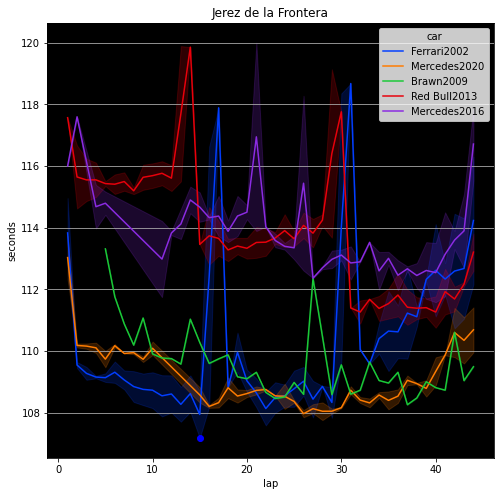

In [ ]:
font = {'family': 'serif',
        'color':  'w',
        'weight': 'normal',
        'size': 16,
        }

#rcParams['font.family'] = 'sans-serif'
#rcParams['font.weight'] = 'regular'  #can omit this, it's the default
#rcParams['font.sans-serif'] = ['calibri']

cl = lc[lc['location'] == 'Spa']
cl = cl[cl['milliseconds'] < (sum(cl.milliseconds)/len(cl.lap))]
cl = cl.sort_values('milliseconds')
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')

plt.scatter(cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0], min(cl.milliseconds)/1000, c='b')

axs[0].annotate(str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:], 
            (cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0]+1, 
            (min(cl.milliseconds)/1000)), 
            weight='bold', color='w')

ax.set_title(c)
ax.set_facecolor('k')
ax.yaxis.grid()
ax.set_ylabel('seconds')

In [ ]:
str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:]

'1:47:176'

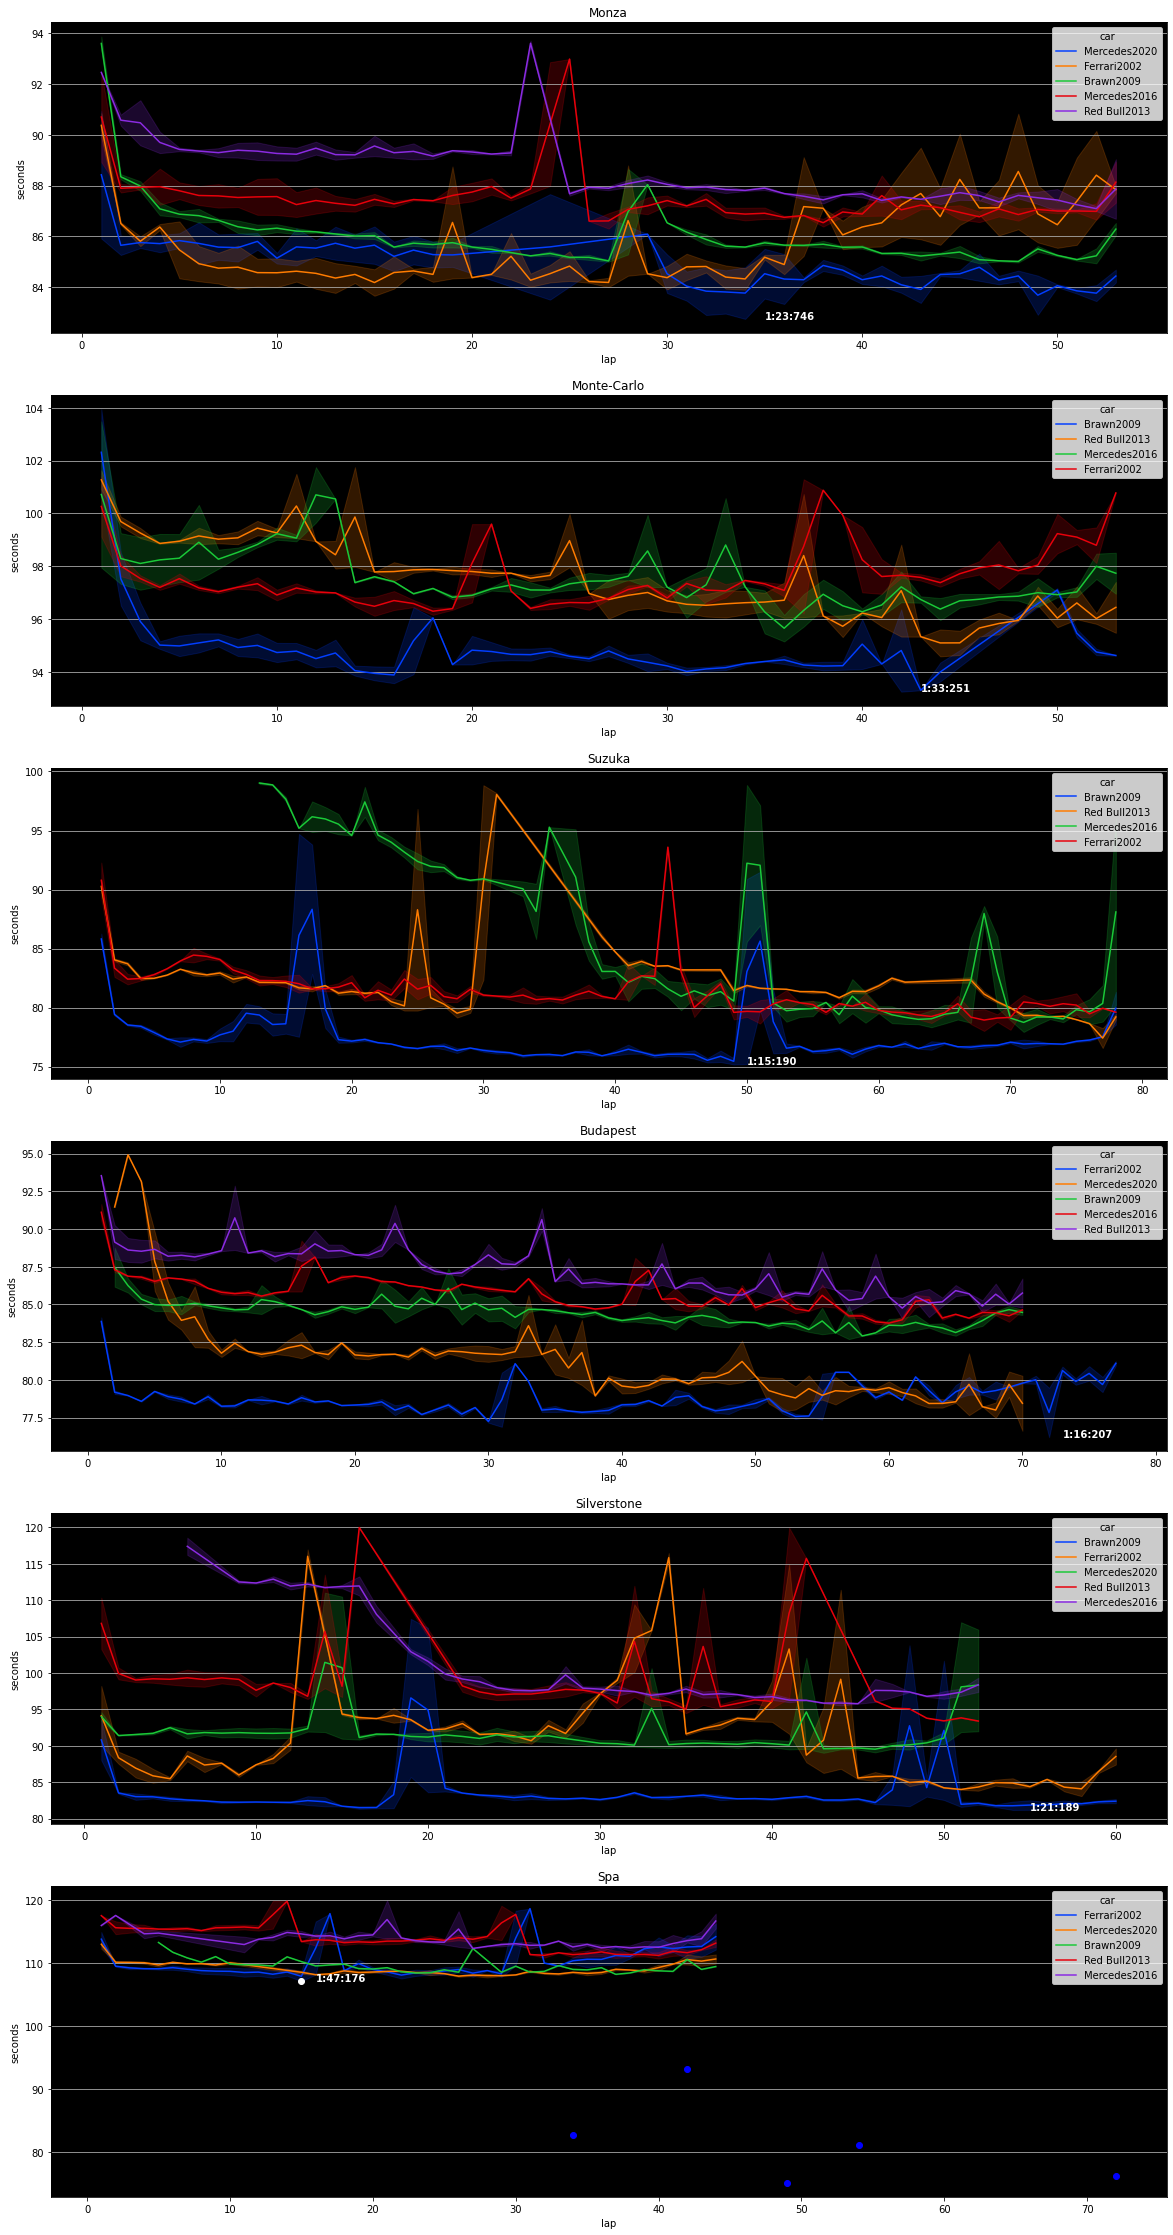

In [ ]:
fig, axs = plt.subplots(6,1, figsize=(20, 40))
axs = axs.ravel()

cl = lc[lc['location'] == 'Monza']
cl = cl[cl['milliseconds'] < (sum(cl.milliseconds)/len(cl.lap))]
cl = cl.sort_values('milliseconds')
sns.lineplot(ax=axs[0], data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')
plt.scatter(cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0], min(cl.milliseconds)/1000, c='b')

axs[0].annotate(str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:], 
            (cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0]+1, 
            (min(cl.milliseconds)/1000)), 
            weight='bold', color='w')

cl = lc[lc['location'] == 'Suzuka']
cl = cl[cl['milliseconds'] < 105000]
cl = cl.sort_values('milliseconds')
sns.lineplot(ax=axs[1], data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')
plt.scatter(cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0], min(cl.milliseconds)/1000, c='b')

axs[1].annotate(str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:], 
            (cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0]+1, 
            (min(cl.milliseconds)/1000)), 
            weight='bold', color='w')

cl = lc[lc['location'] == 'Monte-Carlo']
cl = cl[cl['milliseconds'] < (sum(cl.milliseconds)/len(cl.lap))+10000]
cl = cl.sort_values('milliseconds')
sns.lineplot(ax=axs[2], data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')
plt.scatter(cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0], min(cl.milliseconds)/1000, c='b')

axs[2].annotate(str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:], 
            (cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0]+1, 
            (min(cl.milliseconds)/1000)), 
            weight='bold', color='w')

cl = lc[lc['location'] == 'Budapest']
cl = cl[cl['milliseconds'] < 95000]
cl = cl.sort_values('milliseconds')
sns.lineplot(ax=axs[3], data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')
plt.scatter(cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0], min(cl.milliseconds)/1000, c='b')

axs[3].annotate(str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:], 
            (cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0]+1, 
            (min(cl.milliseconds)/1000)), 
            weight='bold', color='w')

cl = lc[lc['location'] == 'Silverstone']
cl = cl[cl['milliseconds'] < 120000]
cl = cl.sort_values('milliseconds')
sns.lineplot(ax=axs[4], data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')
plt.scatter(cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0], min(cl.milliseconds)/1000, c='b')

axs[4].annotate(str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:], 
            (cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0]+1, 
            (min(cl.milliseconds)/1000)), 
            weight='bold', color='w')

cl = lc[lc['location'] == 'Spa']
cl = cl[cl['milliseconds'] < (sum(cl.milliseconds)/len(cl.lap))]
cl = cl.sort_values('milliseconds')
sns.lineplot(ax=axs[5], data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')
plt.scatter(cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0], min(cl.milliseconds)/1000, c='w')

axs[5].annotate(str((min(cl.milliseconds)/1000)//60)[0]+':'+str(round(min(cl.milliseconds)/1000)-60)+':'+str(min(cl.milliseconds))[-3:], 
            (cl.lap.loc[cl.milliseconds == min(cl.milliseconds)].unique()[0]+1, 
            (min(cl.milliseconds)/1000)), 
            weight='bold', color='w')

for i, c in enumerate(circ):
  axs[i].set_title(c)
  axs[i].set_facecolor('k')
  axs[i].yaxis.grid()
  axs[i].set_ylabel('seconds')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

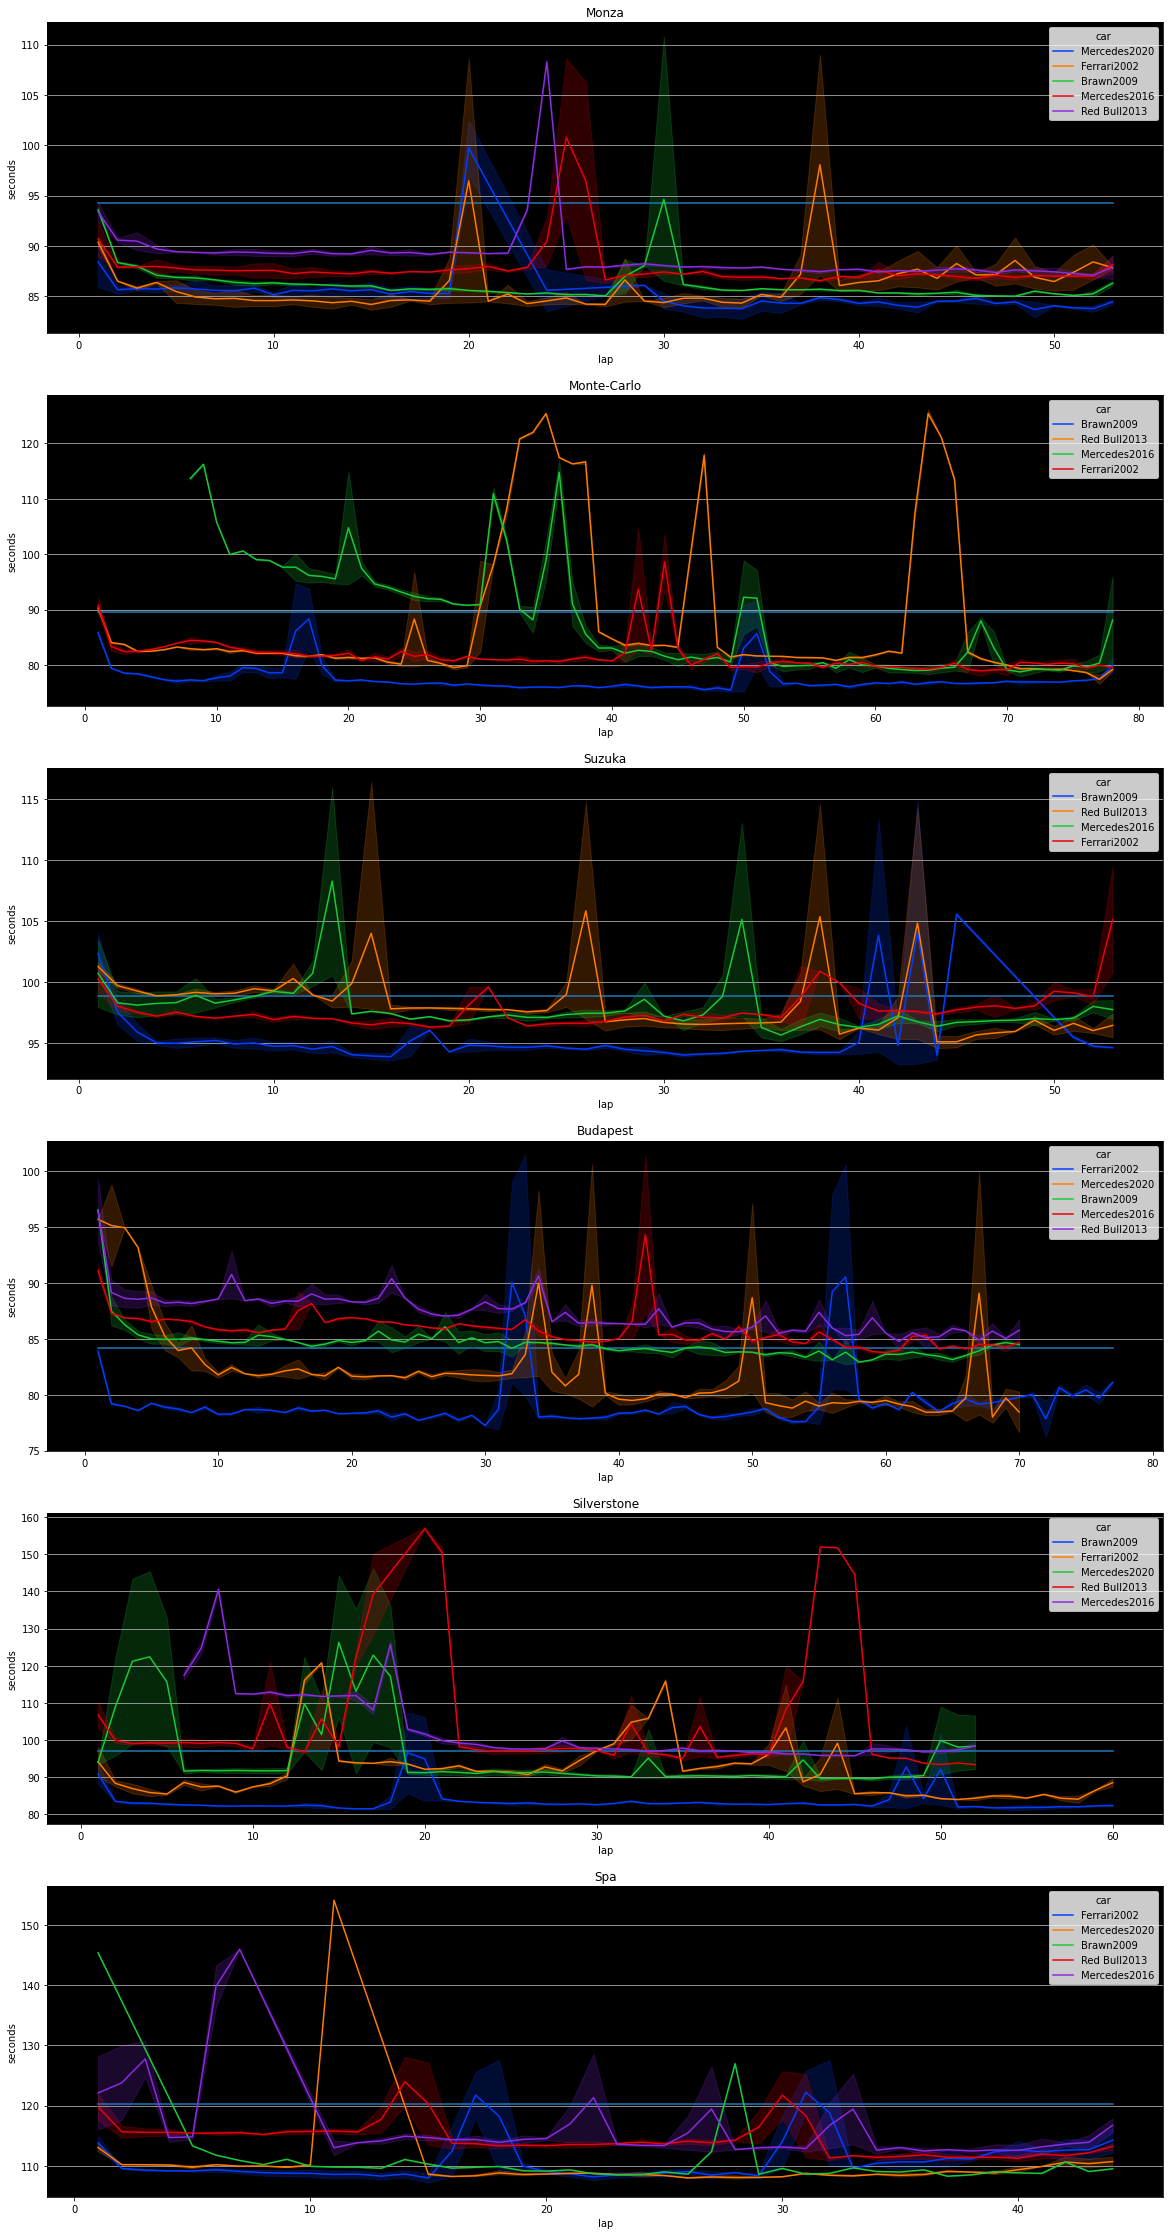

In [ ]:
fig, axs = plt.subplots(6,1, figsize=(20, 40))
axs = axs.ravel()

for i, c in enumerate(circ):
  cl = lc[lc['location'] == c]
  cl['avg'] = [sum(cl.milliseconds)/len(cl.lap)] * len(cl)
  sns.lineplot(ax=axs[i], data=cl, x=cl.lap, y=cl.avg/1000, palette='bright')

  cl = cl.sort_values('milliseconds')[:-35]

  sns.lineplot(ax=axs[i], data=cl, x=cl.lap, y=cl.milliseconds/1000, hue=cl.car, palette='bright')
  axs[i].set_title(c)
  axs[i].set_facecolor('k')
  axs[i].yaxis.grid()
  axs[i].set_ylabel('seconds')

In [ ]:
cy = cy.groupby('year').agg(team=('name', 'max'), posizione_media=('positionOrder', 'mean')).sort_values('posizione_media').reset_index()
cy['car'] = [x + str(y) for x,y in zip(cy.team, cy.year)]
cy

year      team  posizione_media           car
0  2016  Mercedes         3.476190  Mercedes2016
1  1988   McLaren         3.718750   McLaren1988
2  2020  Mercedes         3.735294  Mercedes2020
3  2002   Ferrari         4.147059   Ferrari2002
4  2013  Red Bull         4.815789  Red Bull2013
5  2009     Brawn         4.882353     Brawn2009
6  1992  Williams         6.468750  Williams1992

In [ ]:
results

raceId  driverId  constructorId  positionOrder  race_duration_s  \
0          18         1              1              1             5691   
1          18         2              2              2             5696   
2          18         3              3              3             5699   
3          18         4              4              4             5708   
4          18         5              1              5             5709   
...       ...       ...            ...            ...              ...   
25655    1086       825            210             16                0   
25656    1086       848              3             17                0   
25657    1086       849              3             18                0   
25658    1086       852            213             19                0   
25659    1086       822             51             20                0   

       fastestLapTime  points  fastestLapSpeed  
0              87.452    10.0              218  
1              87.739     8.0              218  
2              88.090     6.0              217  
3              88.603     5.0              215  
4              87.418     4.0              218  
...               ...     ...              ...  
25655          83.511     0.0              189  
25656          83.047     0.0              190  
25657          82.478     0.0              191  
25658          83.538     0.0              189  
25659          84.002     0.0              188  

[25660 rows x 8 columns]

In [ ]:
cy

year      team  posizione_media           car
0  2016  Mercedes         3.476190  Mercedes2016
1  1988   McLaren         3.718750   McLaren1988
2  2020  Mercedes         3.735294  Mercedes2020
3  2002   Ferrari         4.147059   Ferrari2002
4  2013  Red Bull         4.815789  Red Bull2013
5  2009     Brawn         4.882353     Brawn2009
6  1992  Williams         6.468750  Williams1992

# STREAMLIT

In [2]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 6.9 MB/s 
     |████████████████████████████████| 237 kB 46.2 MB/s 
     |████████████████████████████████| 164 kB 15.3 MB/s 
     |████████████████████████████████| 4.7 MB 41.8 MB/s 
     |████████████████████████████████| 181 kB 49.8 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 4.9 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=d8ff992b0f7a19af9d191ff933489deddaff2820e3f7e038a55a758083e0f74a
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [3]:
import streamlit as st
import firebase_admin
from firebase_admin import credentials, firestore
import pandas as pd

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2022-10-05 21:23:28.559 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


In [19]:
if not firebase_admin._apps:
    cred = credentials.Certificate("formula1_firebase_key.json")
    firebase_admin.initialize_app(cred)

db = firestore.client()

res = db.collection('f1').stream()


st.write('### Ordinativi e consegne')
st.bar_chart(df.groupby(['year', 'constructorId'])['points_y'].sum().reset_index())


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
zona = st.sidebar.radio(
    "raceId:",
    ('Tutte', 'EUR', 'NAM'))
standard = st.sidebar.checkbox('Solo consegna normale')

if standard:
    df=df[df.consegna=='STANDARD']
if zona == 'EUR':
    st.dataframe(df[df.origine=='EUR'])
elif zona == 'NAM':
    st.dataframe(df[df.origine=='NAM'])
else:
    st.dataframe(df)

In [24]:
#MODIFICARE L'ID DEL DOCUMENTO CON UNO DEL PROPRIO DATABASE
'''doc_ref = db.collection('amici').document('6I8xP0bnZxFeSGgQ4Co1')
print(type(doc_ref))
print(type(doc_ref.get()))

dati=doc_ref.get().to_dict()
print(dati)
print(f"Nome: {dati['nome']}")'''

migliore_amico={
'nome': 'Simone',
'scuola': False,
'eta': 19,
'citta': 'Roma'
}
db.collection('amici').document('migliore-amico').set(migliore_amico)

for d in db.collection('amici').stream():
   # d è un DocumentSnapshot
   dati=d.to_dict() 
   if 'citta' in dati:
      print(dati)



{'scuola': False, 'eta': 19, 'citta': 'Roma', 'nome': 'Simone'}


In [25]:
doc = db.collection('amici').add({'nome':'Giuliano','indirizzo':'via Rossi 20'})
doc_id=doc[1].id
print(f'Ho creato il documento {doc_id}\nContiene: {doc[1].get().to_dict()}\n')

db.collection('amici').document(doc_id).update({'nome':'Ivan'})
print(f'Ho modificato il documento {doc_id}\nContiene: {doc[1].get().to_dict()}\n')

db.collection('amici').document(doc_id).delete()

print(f'Ho cancellato il documento {doc_id}')



Ho creato il documento RzppwaRASO3ixw6d7YQx
Contiene: {'indirizzo': 'via Rossi 20', 'nome': 'Giuliano'}

Ho modificato il documento RzppwaRASO3ixw6d7YQx
Contiene: {'nome': 'Ivan', 'indirizzo': 'via Rossi 20'}

Ho cancellato il documento RzppwaRASO3ixw6d7YQx


In [27]:
from random import choice,randint,seed
seed(10)

###########
nomi=['Giulio','Andrea','Silvia','Alessio','Sandra','Michela','Lorenzo']
cognomi=['Rossi','Verdi','Gialli','Bianchi','Azzurri','Arancioni']
citta=['Roma','Napoli','Torino','Milano']
###########

#firebase_admin.initialize_app(cred)

db = firestore.client()

collection = db.collection('amici')

for i in range(1,11):
    doc=collection.document(f'amico{i}')
    # doc è un DocumentReference
    doc.set({'nome':choice(nomi),'cognome':choice(cognomi),'eta':randint(18,27),'scuola':choice([True,False])})
    # dal DocumentReference posso estrarre l'id
    print(f"Ho creato {doc.id}...")


Ho creato amico1...
Ho creato amico2...
Ho creato amico3...
Ho creato amico4...
Ho creato amico5...
Ho creato amico6...
Ho creato amico7...
Ho creato amico8...
Ho creato amico9...
Ho creato amico10...


In [28]:


print('Tutti gli amici con più di 23 anni')
for d in collection.where('eta','>',23).stream():
    print(d.to_dict())

print(f'\n{"#"*10}\n')

for d in collection \
         .where('eta','>',23) \
         .order_by('eta') \
         .limit(2) \
         .stream():
    print(f"{d.get('nome')} {d.get('cognome')} ({d.get('eta')} anni)")

Tutti gli amici con più di 23 anni
{'scuola': False, 'nome': 'Sandra', 'eta': 24, 'cognome': 'Rossi'}
{'scuola': False, 'cognome': 'Bianchi', 'nome': 'Andrea', 'eta': 25}
{'cognome': 'Verdi', 'nome': 'Lorenzo', 'eta': 25, 'scuola': False}
{'cognome': 'Rossi', 'eta': 26, 'scuola': False, 'nome': 'Andrea'}

##########

Sandra Rossi (24 anni)
Andrea Bianchi (25 anni)


In [30]:
from random import choice,randint,seed
seed(10)

prodotti={
1:5,
2:10,
3:6,
4:8
}

cliente={
1:'EUR',
2:'NAM',
3:'EUR',
4:'EUR',
5:'NAM',
6:'EUR',
7:'NAM',
8:'EUR'
}

def crea_ordine():
    cliente_ordine=choice(list(cliente.items()))
    return {
      'id':cliente_ordine[0],
      'origine':cliente_ordine[1],
      'importo': randint(1,5)*7.5,
      'consegna':choice(['RAPIDA','STANDARD'])
    }
        
    


In [31]:
collection = db.collection('gestionale')

for i in range(1,11):
    ord_id="ORD{:02d}".format(i)
    collection.document(ord_id).set(crea_ordine())
    print(f'Ho creato {ord_id}...')



Ho creato ORD01...
Ho creato ORD02...
Ho creato ORD03...
Ho creato ORD04...
Ho creato ORD05...
Ho creato ORD06...
Ho creato ORD07...
Ho creato ORD08...
Ho creato ORD09...
Ho creato ORD10...


In [32]:


if not firebase_admin._apps:
    cred = credentials.Certificate("esempio-due-firebase-adminsdk-kz65d-2d5f2b1259.json")
    firebase_admin.initialize_app(cred)

db = firestore.client()

res = db.collection('gestionale').stream()
dati=[{'ordine':x.id,**x.to_dict()} for x in res]

df=pd.DataFrame(dati)[['ordine','id','origine','importo','consegna']]
df.set_index('ordine',inplace=True)

st.write('### Ordinativi e consegne')
st.bar_chart(df.groupby('origine')['importo'].sum())
zona = st.sidebar.radio(
    "Zona:",
    ('Tutte', 'EUR', 'NAM'))
standard = st.sidebar.checkbox('Solo consegna normale')

if standard:
    df=df[df.consegna=='STANDARD']
if zona == 'EUR':
    st.dataframe(df[df.origine=='EUR'])
elif zona == 'NAM':
    st.dataframe(df[df.origine=='NAM'])
else:
    st.dataframe(df)

In [ ]:
if not firebase_admin._apps:
    cred = credentials.Certificate("esempio-due-firebase-adminsdk-kz65d-2d5f2b1259.json")
    firebase_admin.initialize_app(cred)

db = firestore.client()

res = db.collection('f1').stream()
dati=[{'ordine':x.id,**x.to_dict()} for x in res]

df=pd.DataFrame(dati)[['ordine','id','origine','importo','consegna']]
df.set_index('ordine',inplace=True)

st.write('### Ordinativi e consegne')
st.bar_chart(df.groupby('origine')['importo'].sum())
zona = st.sidebar.radio(
    "Zona:",
    ('Tutte', 'EUR', 'NAM'))
standard = st.sidebar.checkbox('Solo consegna normale')

if standard:
    df=df[df.consegna=='STANDARD']
if zona == 'EUR':
    st.dataframe(df[df.origine=='EUR'])
elif zona == 'NAM':
    st.dataframe(df[df.origine=='NAM'])
else:
    st.dataframe(df)

# machine learning dataset

In [ ]:
circuit = 'Singapore'
circuit = 15
res = results.merge(lap_times, on=['raceId', 'driverId'])\
        .merge(races, on='raceId')\
        .merge(constr_standings.drop(['points', 'position'], axis=1))\
        .drop(['raceId', 'points', 'race_duration_s', 'points', 'position'], axis=1)
len(res)

526711

In [ ]:
res.head(1)

driverId  constructorId  positionOrder  fastestLapTime  fastestLapSpeed  \
0         1              1              1          87.452              218   

   lap  milliseconds  year  circuitId  wins  
0    1        121465  2008          1     1

In [ ]:
#len([x if x == 1 for x in y])


{0, 1}

In [ ]:
list(set(list(constr_standings.columns.unique())).intersection(list(res.columns.unique())))


['constructorId', 'wins']

In [ ]:
list(constr_standings.columns.unique()), list(res.columns.unique())

(['raceId', 'constructorId', 'points', 'position', 'wins'],
 ['driverId',
  'constructorId',
  'positionOrder',
  'fastestLapTime',
  'fastestLapSpeed',
  'lap',
  'milliseconds',
  'year',
  'circuitId',
  'wins'])

In [ ]:
y = [1 if x==1 else 0 for x in res['wins']]
features = res.drop('wins', axis=1)

len(features)

526711

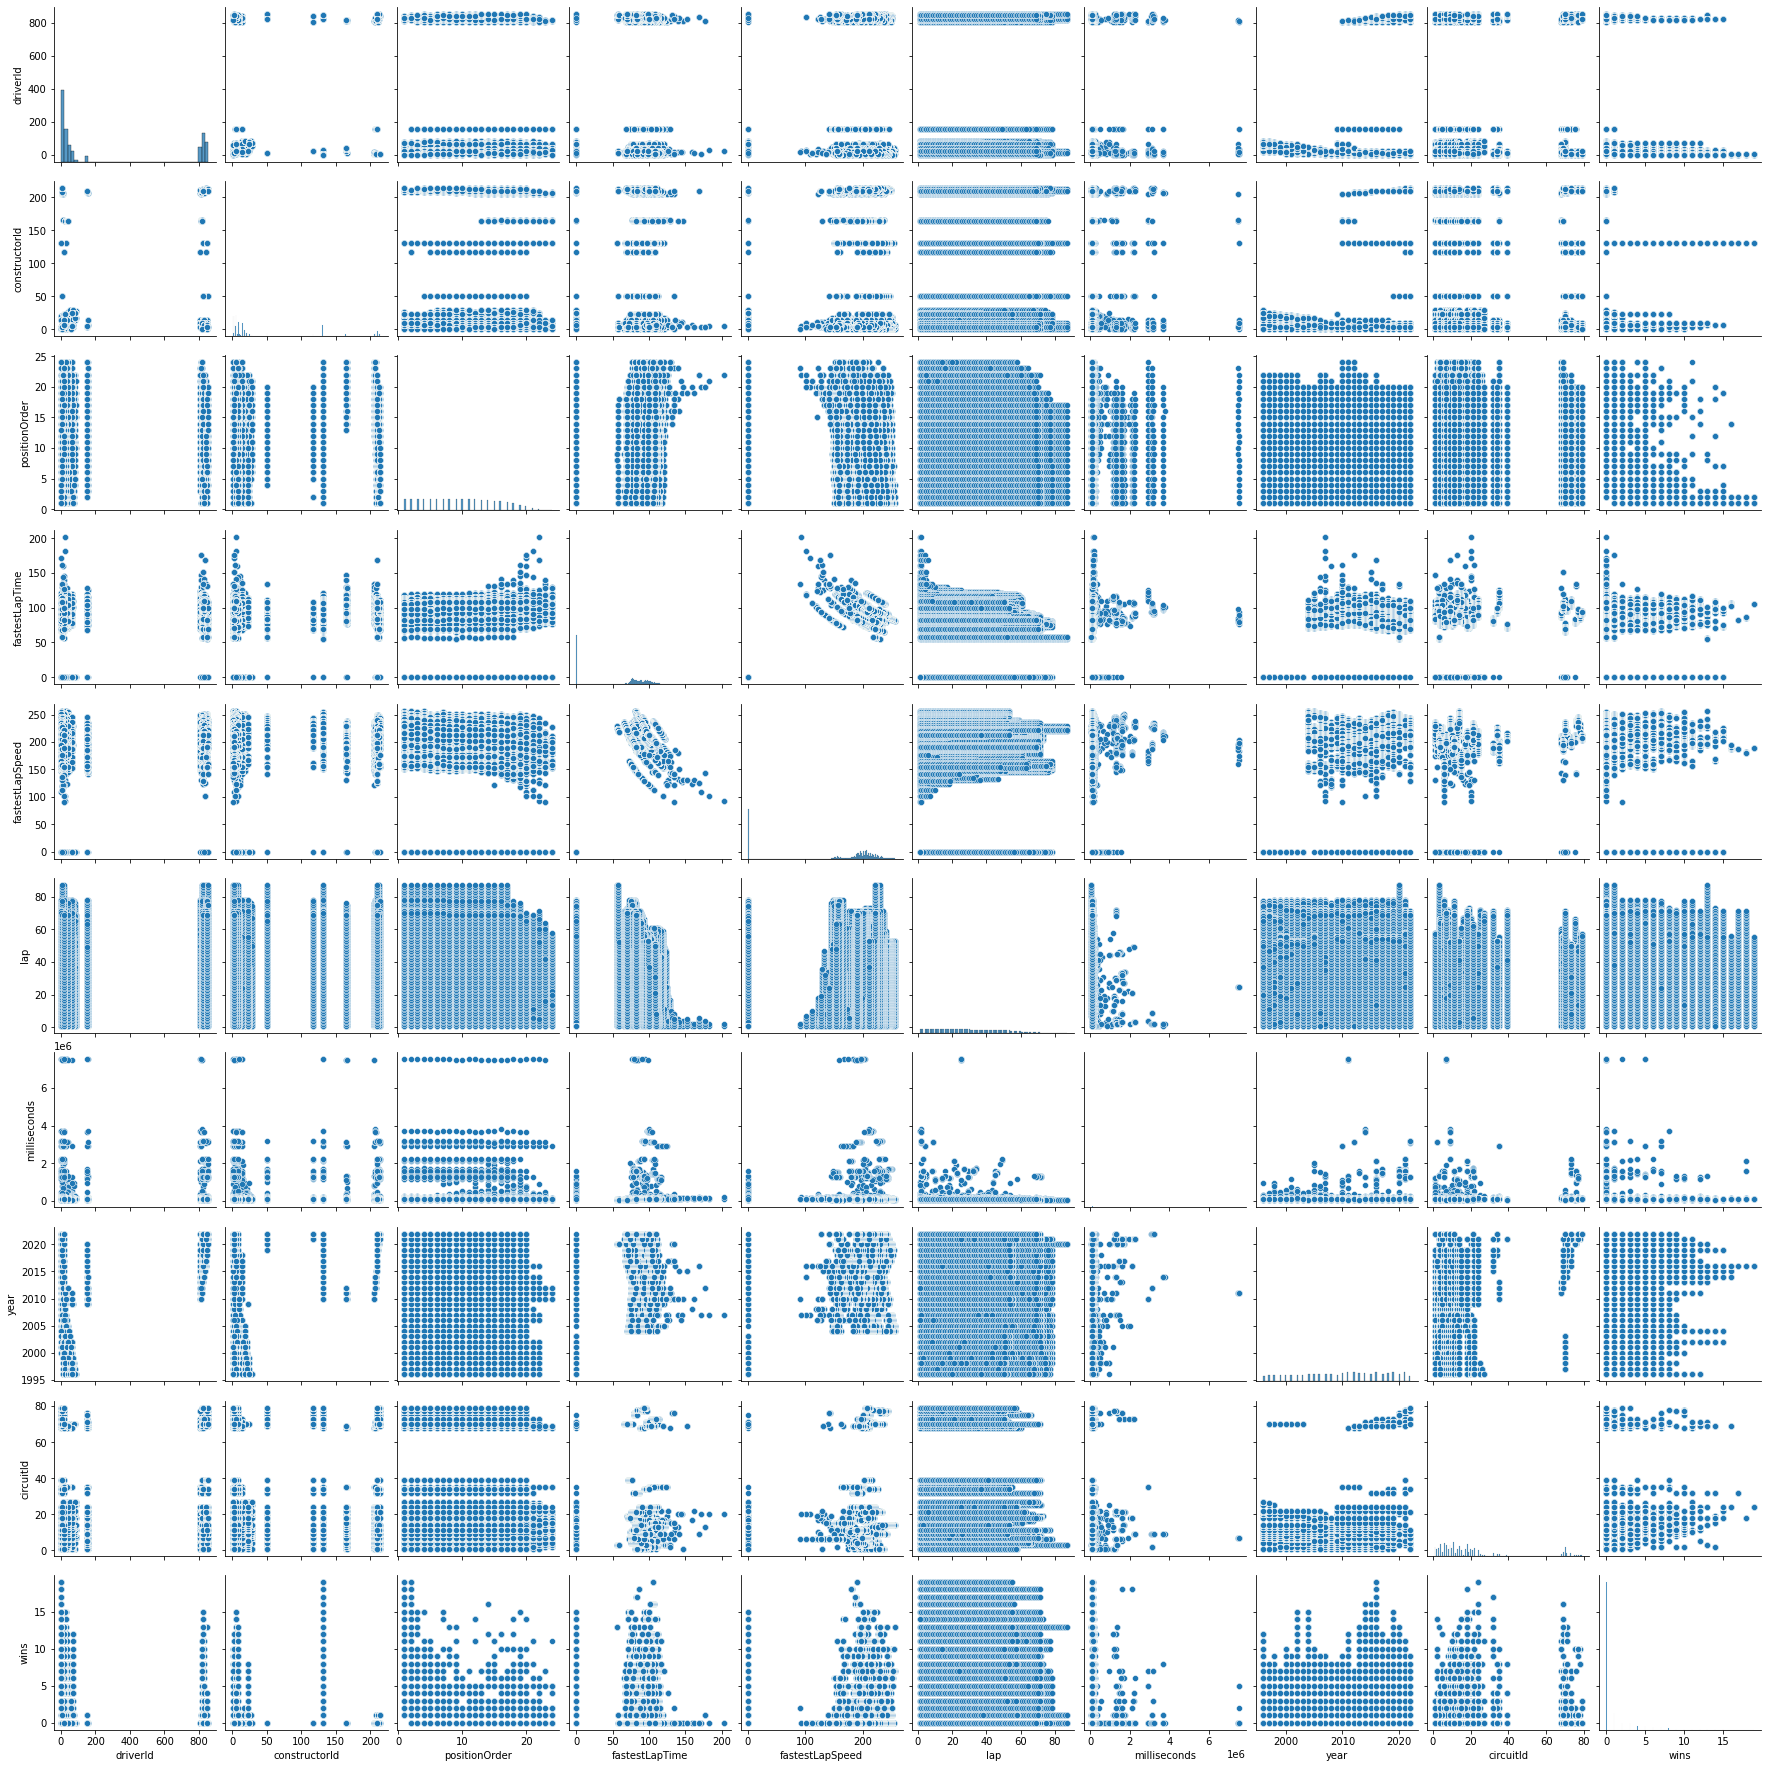

In [ ]:
sns.pairplot(res)

In [ ]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

features = scale(features)
X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2, random_state=1312)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1312)
model.fit(X_train, y_train)

LogisticRegression(random_state=1312)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

report=classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     96194
           1       0.00      0.00      0.00      9149

    accuracy                           0.91    105343
   macro avg       0.46      0.50      0.48    105343
weighted avg       0.83      0.91      0.87    105343



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
